Data Loading and Preparation
Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing data is in a CSV file

In [2]:
dfH = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv')

Exploratory Data Analysis (EDA)

Check for missing values:
Handle missing values (if any):
Fill missing values with mean


In [3]:
from sklearn.impute import SimpleImputer
# Identify columns with null values
columns_with_nulls = dfH.columns[dfH.isnull().any()]

# Choose a strategy for handling null values using 'mean'
imputer = SimpleImputer(strategy='mean') 

# Fit and transform the imputer on the specified columns
dfH[columns_with_nulls] = imputer.fit_transform(dfH[columns_with_nulls])


In [4]:
dfH.sample(5)

Casual        Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
23226   528.0  2023-08-26    18   596.0       1124.0                       64   
18457    81.0  2023-02-09    11   252.0        333.0                       74   
13945   335.0  2022-08-05    11   289.0        624.0                       75   
15864   153.0  2022-10-24    10   223.0        376.0                       90   
18950    18.0  2023-03-02     0    32.0         50.0                       92   

       temperature_2m (°C)  weathercode (wmo code)  windspeed_10m (km/h)  
23226                 18.4                       2                  16.7  
18457                 11.7                       3                  11.7  
13945                 28.7                       3                   2.5  
15864                 13.9                       3                   8.8  
18950                  9.2                       1                  11.2

In [5]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [6]:
dfH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26280 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26280 non-null  float64
 4   Total_rides              26280 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [7]:
dfH.apply(lambda x: len(x.unique()))

Casual                      836
Date                       1095
Hour                         24
Member                     1160
Total_rides                1671
relativehumidity_2m (%)      96
temperature_2m (°C)         532
weathercode (wmo code)       13
windspeed_10m (km/h)        332
dtype: int64

In [8]:
dfH.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

Data Visualization
Explore the relationship between bike rentals and time:

In [9]:
# Calculate the total number of rides
total_rides = dfH["Total_rides"].sum()
print("Total rides:", total_rides)

Total rides: 10698475.052723743


In [10]:
# Add a new column with an index as a counting number
dfH['Count'] = dfH.index

dfH.head()

Casual        Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0    20.0  2021-01-01     0    26.0         46.0                       90   
1    23.0  2021-01-01     1    23.0         46.0                       88   
2    20.0  2021-01-01     2    28.0         48.0                       87   
3     9.0  2021-01-01     3     7.0         16.0                       81   
4     7.0  2021-01-01     4     5.0         12.0                       77   

   temperature_2m (°C)  weathercode (wmo code)  windspeed_10m (km/h)  Count  
0                  2.4                       1                  10.2      0  
1                  1.8                       1                  10.0      1  
2                  1.1                       2                  10.1      2  
3                  1.6                       2                  10.6      3  
4                  1.6                       2                   9.9      4

In [11]:

# Calculate the number of rides by member type
member_rides = dfH.groupby("Member")["Total_rides"].sum()
print("Rides by member type:\n", member_rides)

Rides by member type:
 Member
0.0         85.0
1.0        282.0
2.0        748.0
3.0       1312.0
4.0       1763.0
           ...  
1490.0    2185.0
1495.0    2242.0
1507.0    2185.0
1528.0    2175.0
1534.0    2262.0
Name: Total_rides, Length: 1160, dtype: float64


In [12]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)', 'Count'],
      dtype='object')

In [13]:
dfH = dfH.rename(columns={'weathercode (wmo code)':'weather',
                       'temperature_2m (°C)':'Temp',
                       'windspeed_10m (km/h)':'Windspeed',
                       'relativehumidity_2m (%)':'Humidity'})
dfH.head()

Casual        Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0  2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0  2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0  2021-01-01     2    28.0         48.0        87   1.1        2   
3     9.0  2021-01-01     3     7.0         16.0        81   1.6        2   
4     7.0  2021-01-01     4     5.0         12.0        77   1.6        2   

   Windspeed  Count  
0       10.2      0  
1       10.0      1  
2       10.1      2  
3       10.6      3  
4        9.9      4

In [14]:
# Convert the 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])

# # Extract Month and Year from the 'Date' column
# dfH['Month'] = dfH['Date'].dt.month
# dfH['Year'] = dfH['Date'].dt.year


dfH['Month'] = dfH['Date'].dt.strftime('%B')
dfH["year"]=dfH["Date"].dt.year
dfH["day of week"] = dfH["Date"].dt.strftime("%A")
dfH.head()

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   
3     9.0 2021-01-01     3     7.0         16.0        81   1.6        2   
4     7.0 2021-01-01     4     5.0         12.0        77   1.6        2   

   Windspeed  Count    Month  year day of week  
0       10.2      0  January  2021      Friday  
1       10.0      1  January  2021      Friday  
2       10.1      2  January  2021      Friday  
3       10.6      3  January  2021      Friday  
4        9.9      4  January  2021      Friday

In [15]:
Month_order= ['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'september','October', 'November', 'December' ]

season based on the month

In [16]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in ['December', 'January', 'February']:
      return 'Winter'
    elif month in ['March', 'April', 'May']:
      return 'Spring'
    elif month in ['June', 'July', 'August']:
      return 'Summer'
    else:
      return 'Autumn'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfH['Season'] = dfH['Month'].apply(get_season)
dfH.head()

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   
3     9.0 2021-01-01     3     7.0         16.0        81   1.6        2   
4     7.0 2021-01-01     4     5.0         12.0        77   1.6        2   

   Windspeed  Count    Month  year day of week  Season  
0       10.2      0  January  2021      Friday  Winter  
1       10.0      1  January  2021      Friday  Winter  
2       10.1      2  January  2021      Friday  Winter  
3       10.6      3  January  2021      Friday  Winter  
4        9.9      4  January  2021      Friday  Winter

Weekend And weekdays based on the Day

In [17]:
import pandas as pd

# Convert 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])
dfH['day_of_week'] = dfH['Date'].dt.dayofweek

# Define functions to categorize days
def is_weekday(day):
    return day < 5  # Monday to Friday (0-4)

def is_weekend(day):
    return day >= 5  # Saturday (5) and Sunday (6)

# Create new columns for 'is_weekday' and 'is_weekend'
dfH['is_weekday'] = dfH['day_of_week'].apply(is_weekday)
dfH['is_weekend'] = dfH['day_of_week'].apply(is_weekend)

holidays = ['2023-01-01', '2023-12-25']  # Example: New Year's Day, Christmas Day

# Create a Series of booleans indicating whether each date is a holiday
dfH['is_holiday'] = dfH['Date'].isin(pd.to_datetime(holidays))

# Calculate 'is_working_day'
dfH['is_working_day'] = dfH['is_weekday'] & ~dfH['is_holiday'] 

# Example usage:
weekend_data = dfH[dfH['is_weekend']]
working_day_data = dfH[dfH['is_working_day']]

print(weekend_data)
print(working_day_data)
dfH.head(2)

       Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
24        4.0 2021-01-02     0     8.0         12.0        99   5.2       61   
25        4.0 2021-01-02     1    10.0         14.0        99   5.1       51   
26        1.0 2021-01-02     2     0.0          1.0        98   5.2        3   
27        1.0 2021-01-02     3     1.0          2.0        98   4.0        3   
28        4.0 2021-01-02     4     2.0          6.0        98   4.4        3   
...       ...        ...   ...     ...          ...       ...   ...      ...   
26275   132.0 2023-12-31    19   190.0        322.0        71  -7.7        0   
26276   125.0 2023-12-31    20   194.0        319.0        79 -10.2        0   
26277    84.0 2023-12-31    21   137.0        221.0        80 -11.0        0   
26278    83.0 2023-12-31    22   142.0        225.0        80 -10.4        0   
26279    82.0 2023-12-31    23   106.0        188.0        73  -8.5        0   

       Windspeed  Count     Month  year

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   

   Windspeed  Count    Month  year day of week  Season  day_of_week  \
0       10.2      0  January  2021      Friday  Winter            4   
1       10.0      1  January  2021      Friday  Winter            4   

   is_weekday  is_weekend  is_holiday  is_working_day  
0        True       False       False            True  
1        True       False       False            True

In [18]:
dfH['month_year'] = pd.to_datetime(dfH['Date']).dt.to_period('M')

In [19]:
dfH.head(3)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   

   Windspeed  Count    Month  year day of week  Season  day_of_week  \
0       10.2      0  January  2021      Friday  Winter            4   
1       10.0      1  January  2021      Friday  Winter            4   
2       10.1      2  January  2021      Friday  Winter            4   

   is_weekday  is_weekend  is_holiday  is_working_day month_year  
0        True       False       False            True    2021-01  
1        True       False       False            True    2021-01  
2        True       False       False            True    2021-01

Monthly distribution

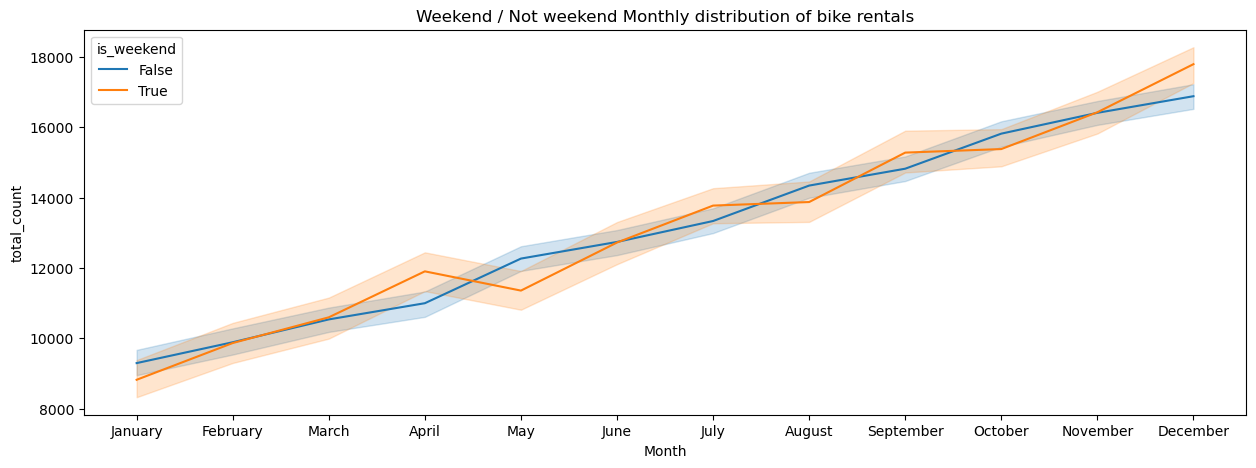

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))

# Calculate mean 'total_count' for each hour and weekend/not weekend
sns.lineplot(x='Month', y='Count', hue='is_weekend', data=dfH, estimator='mean')

# Add title and labels
plt.title('Weekend / Not weekend Monthly distribution of bike rentals')
plt.xlabel('Month')
plt.ylabel('total_count')

# Show the plot
plt.show()

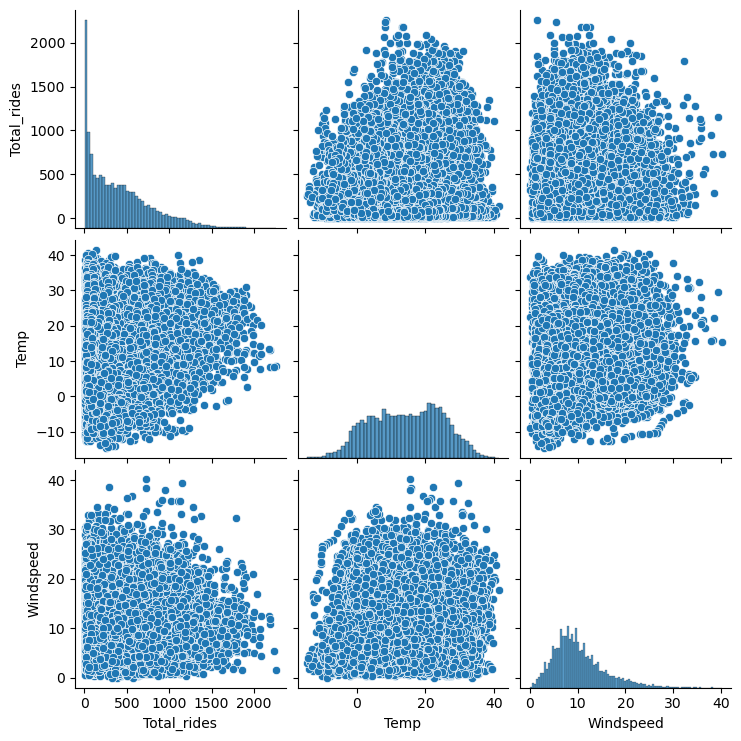

In [21]:
# Pair plot: Visualize relationships between multiple features
sns.pairplot(dfH[['Total_rides', 'Temp', 'Windspeed']])
plt.show()


In [22]:
dfH.head(2)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   

   Windspeed  Count    Month  year day of week  Season  day_of_week  \
0       10.2      0  January  2021      Friday  Winter            4   
1       10.0      1  January  2021      Friday  Winter            4   

   is_weekday  is_weekend  is_holiday  is_working_day month_year  
0        True       False       False            True    2021-01  
1        True       False       False            True    2021-01

In [23]:
# Function to categorize weather codes
def categorize_weather_code(code):
    if code == 0:
        return 'sunny'
    elif 1 <= code <= 3:
        return 'cloudy'
    elif 51 <= code <= 55:
        return 'foggy'
    elif 61 <= code <= 65:
        return 'rainy'
    elif 71 <= code <= 75:
        return 'snow'
    else:
        return 'unknown'  # For any code that doesn't match the given categories

# Apply the function to create the new column
dfH['weather_condition'] = dfH['weather'].apply(categorize_weather_code)

# This will print the first few rows of the DataFrame to verify the new column
dfH.head()

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   
3     9.0 2021-01-01     3     7.0         16.0        81   1.6        2   
4     7.0 2021-01-01     4     5.0         12.0        77   1.6        2   

   Windspeed  Count  ...  year  day of week  Season day_of_week  is_weekday  \
0       10.2      0  ...  2021       Friday  Winter           4        True   
1       10.0      1  ...  2021       Friday  Winter           4        True   
2       10.1      2  ...  2021       Friday  Winter           4        True   
3       10.6      3  ...  2021       Friday  Winter           4        True   
4        9.9      4  ...  2021       Friday  Winter           4        True   

   is_weekend  is_holiday  is_working_day  month_year weather_condition  
0       False       False            True     2021-01            cloudy  
1       False       False            True     2021-01            cloudy  
2       False       False            True     2021-01            cloudy  
3       False       False            True     2021-01            cloudy  
4       False       False            True     2021-01            cloudy  

[5 rows x 21 columns]

In [24]:
sum_casual_user = dfH.groupby("day of week").Casual.sum().sort_values(ascending=False).reset_index()
sum_casual_user

day of week         Casual
0    Saturday  840122.000000
1      Sunday  706299.790209
2      Friday  600467.790209
3    Thursday  536888.930070
4   Wednesday  515213.930070
5     Tuesday  504352.790209
6      Monday  499617.000000

In [25]:
sum_registered_user = dfH.groupby("day of week").Member.sum().sort_values(ascending=False).reset_index()
sum_registered_user

day of week        Member
0   Wednesday  1.028920e+06
1     Tuesday  1.002770e+06
2    Thursday  1.002009e+06
3      Friday  9.324505e+05
4      Monday  8.837850e+05
5    Saturday  8.745080e+05
6      Sunday  7.710695e+05

In [26]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="day of week",
    right_on="day of week"
)
daily_user

day of week         Casual        Member
0    Saturday  840122.000000  8.745080e+05
1      Sunday  706299.790209  7.710695e+05
2      Friday  600467.790209  9.324505e+05
3    Thursday  536888.930070  1.002009e+06
4   Wednesday  515213.930070  1.028920e+06
5     Tuesday  504352.790209  1.002770e+06
6      Monday  499617.000000  8.837850e+05

In [27]:
daily_user_type = daily_user.melt(id_vars='day of week', var_name='User_type', value_name='user_count')
daily_user_type

day of week User_type    user_count
0     Saturday    Casual  8.401220e+05
1       Sunday    Casual  7.062998e+05
2       Friday    Casual  6.004678e+05
3     Thursday    Casual  5.368889e+05
4    Wednesday    Casual  5.152139e+05
5      Tuesday    Casual  5.043528e+05
6       Monday    Casual  4.996170e+05
7     Saturday    Member  8.745080e+05
8       Sunday    Member  7.710695e+05
9       Friday    Member  9.324505e+05
10    Thursday    Member  1.002009e+06
11   Wednesday    Member  1.028920e+06
12     Tuesday    Member  1.002770e+06
13      Monday    Member  8.837850e+05

C:\Users\meeta\AppData\Local\Temp\ipykernel_33220\2627357483.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.5'` for the same effect.

  sns.barplot(x="Casual", y="day of week", data=sum_casual_user, hue="day of week", color='.5', legend=False, ax=ax[0])
C:\Users\meeta\AppData\Local\Temp\ipykernel_33220\2627357483.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.4'` for the same effect.

  sns.barplot(x="Member", y="day of week", data=sum_registered_user, hue="day of week", color = '.4' ,legend=False, ax=ax[1])


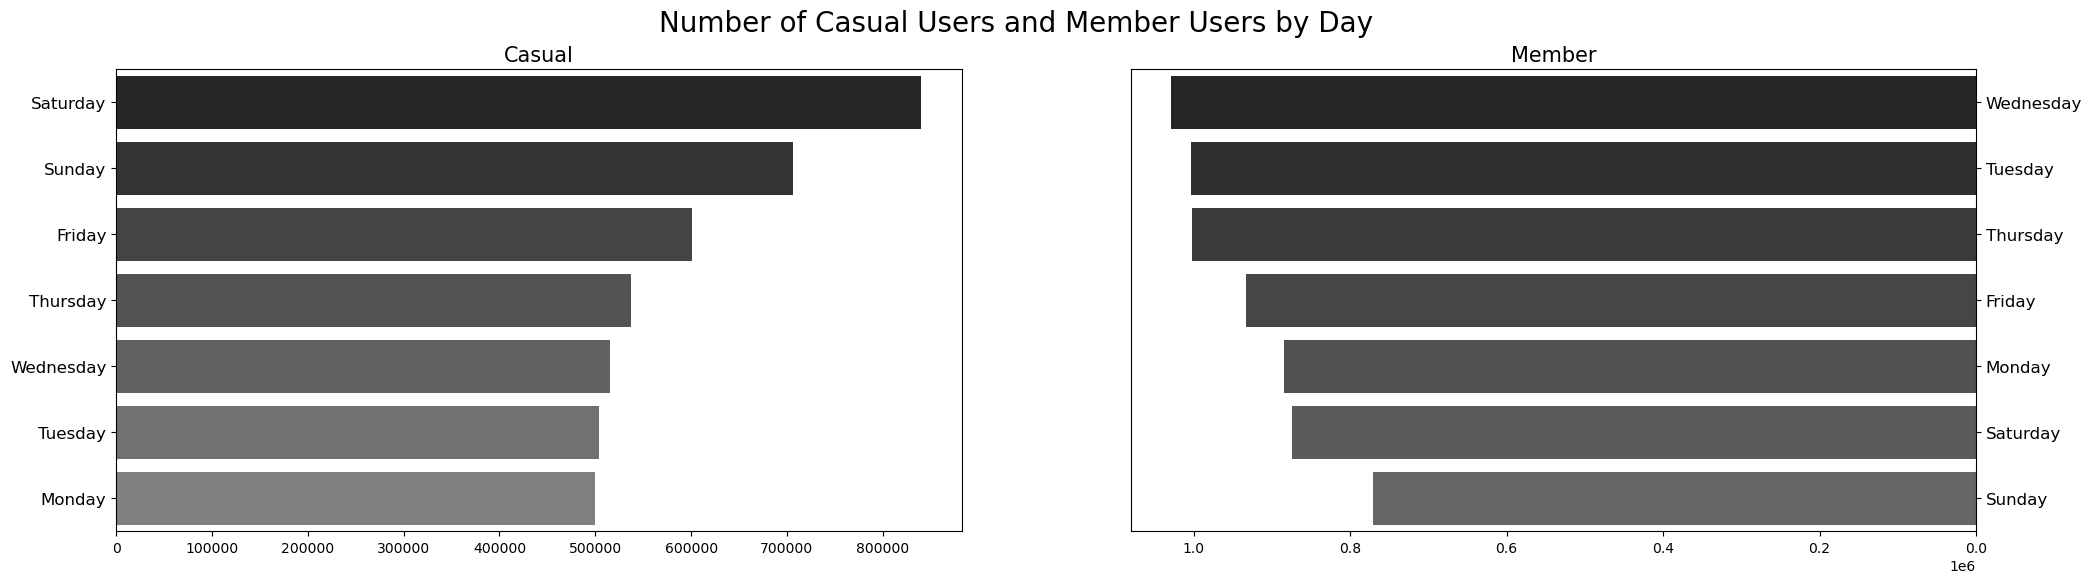

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.barplot(x="Casual", y="day of week", data=sum_casual_user, hue="day of week", color='.5', legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="Member", y="day of week", data=sum_registered_user, hue="day of week", color = '.4' ,legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Member", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual Users and Member Users by Day", fontsize=20)
plt.show()

In [29]:
dfH.head(3)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   

   Windspeed  Count  ...  year  day of week  Season day_of_week  is_weekday  \
0       10.2      0  ...  2021       Friday  Winter           4        True   
1       10.0      1  ...  2021       Friday  Winter           4        True   
2       10.1      2  ...  2021       Friday  Winter           4        True   

   is_weekend  is_holiday  is_working_day  month_year weather_condition  
0       False       False            True     2021-01            cloudy  
1       False       False            True     2021-01            cloudy  
2       False       False            True     2021-01            cloudy  

[3 rows x 21 columns]

In [30]:
weatherby = dfH.groupby("weather_condition").Total_rides.sum().sort_values(ascending=False).reset_index()
weatherby

weather_condition   Total_rides
0            cloudy  5.146005e+06
1             sunny  4.589221e+06
2             foggy  7.887381e+05
3             rainy  1.567940e+05
4              snow  1.771719e+04

In [31]:
seasonby = dfH.groupby("Season").Total_rides.sum().sort_values(ascending=False).reset_index()
seasonby

Season   Total_rides
0  Summer  3.388020e+06
1  Autumn  3.158440e+06
2  Spring  2.652457e+06
3  Winter  1.499558e+06

C:\Users\meeta\AppData\Local\Temp\ipykernel_33220\1907278689.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.5'` for the same effect.

  sns.barplot(y="Total_rides", x="weather_condition", data=weatherby.sort_values(by="Total_rides", ascending=False),color= '.5', hue="weather_condition", legend=False, ax=ax[0])
C:\Users\meeta\AppData\Local\Temp\ipykernel_33220\1907278689.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.4'` for the same effect.

  sns.barplot(y="Total_rides", x="Season", data=seasonby.sort_values(by="Total_rides", ascending=False), color ='.4' , hue="Season", legend=False, ax=ax[1])


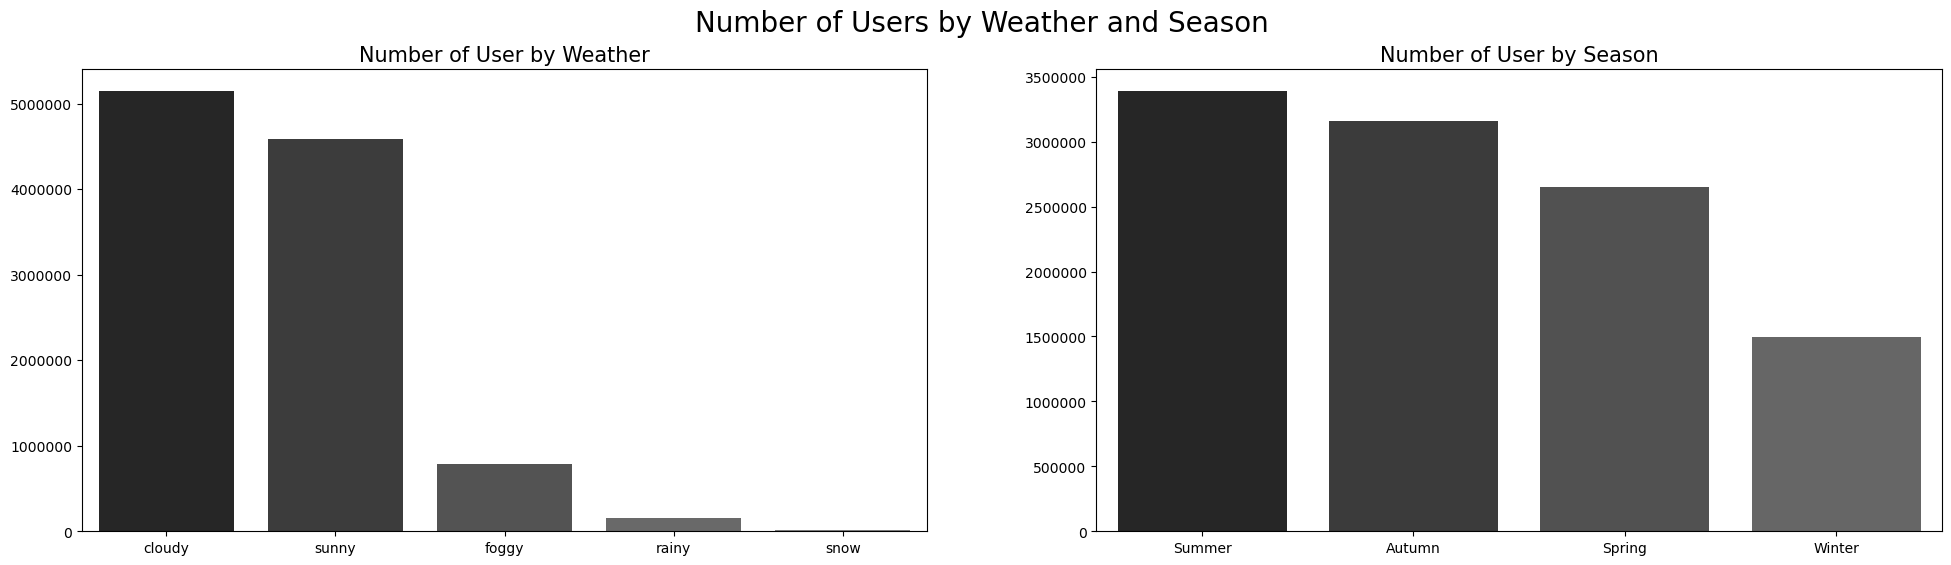

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.barplot(y="Total_rides", x="weather_condition", data=weatherby.sort_values(by="Total_rides", ascending=False),color= '.5', hue="weather_condition", legend=False, ax=ax[0])
ax[0].set_title("Number of User by Weather", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(y="Total_rides", x="Season", data=seasonby.sort_values(by="Total_rides", ascending=False), color ='.4' , hue="Season", legend=False, ax=ax[1])
ax[1].set_title("Number of User by Season", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].ticklabel_format(style='plain', axis='y')

plt.suptitle("Number of Users by Weather and Season", fontsize=20)
plt.show()

In [33]:
# # Convert 'month_year' to datetime for plotting

# plt.figure(figsize=(10, 6))
# sns.lineplot(x='month_year', y='Total_rides', data=daily_user_type , hue='User_type', color='r')
# plt.xticks(rotation=45)
# plt.xticks(ticks=dfH['month_year'].unique())  # Show all months explicitly
# plt.title('Casual and Member Rides by Month')
# plt.ylabel('Total Rides')
# plt.tight_layout()
# plt.show()

Yearly distribution

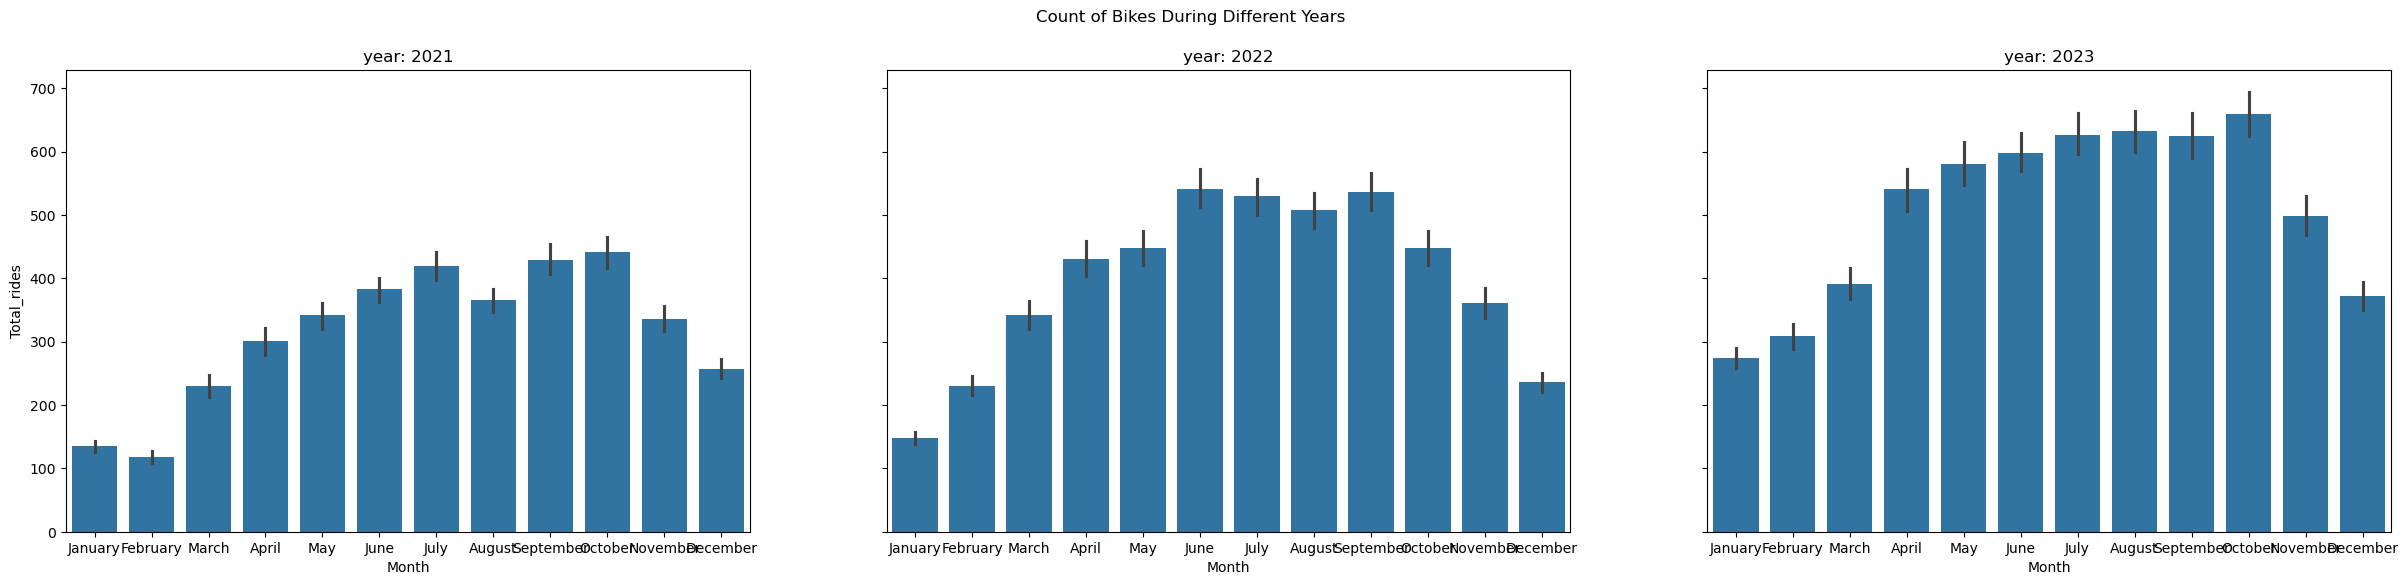

In [34]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'year: {year}')

plt.show()


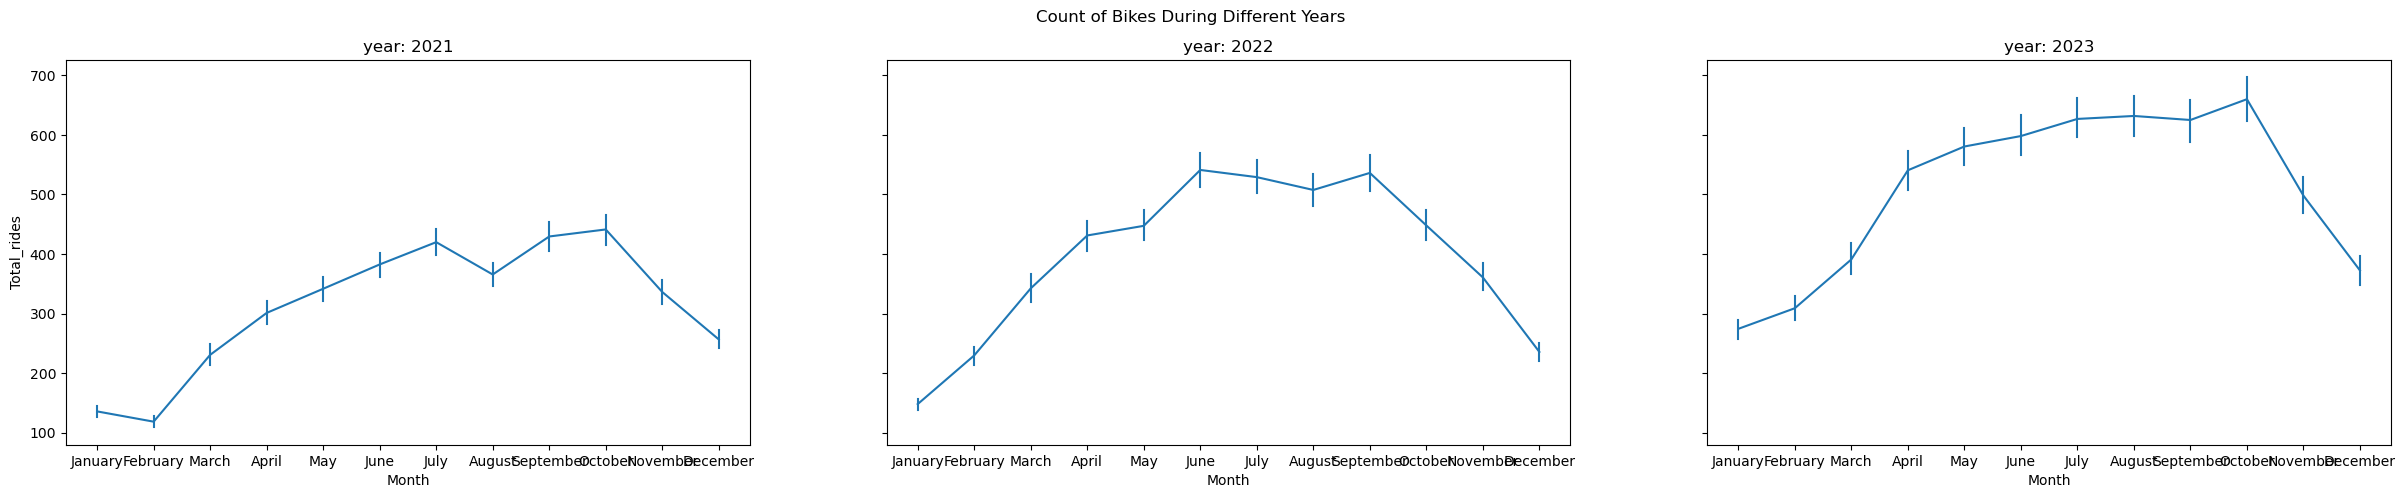

In [35]:
import matplotlib.pyplot as plt
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 5),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.lineplot(data=year_data, x='Month', y='Total_rides', ax=axes[i], err_style="bars")
    axes[i].set_title(f'year: {year}')

plt.show()

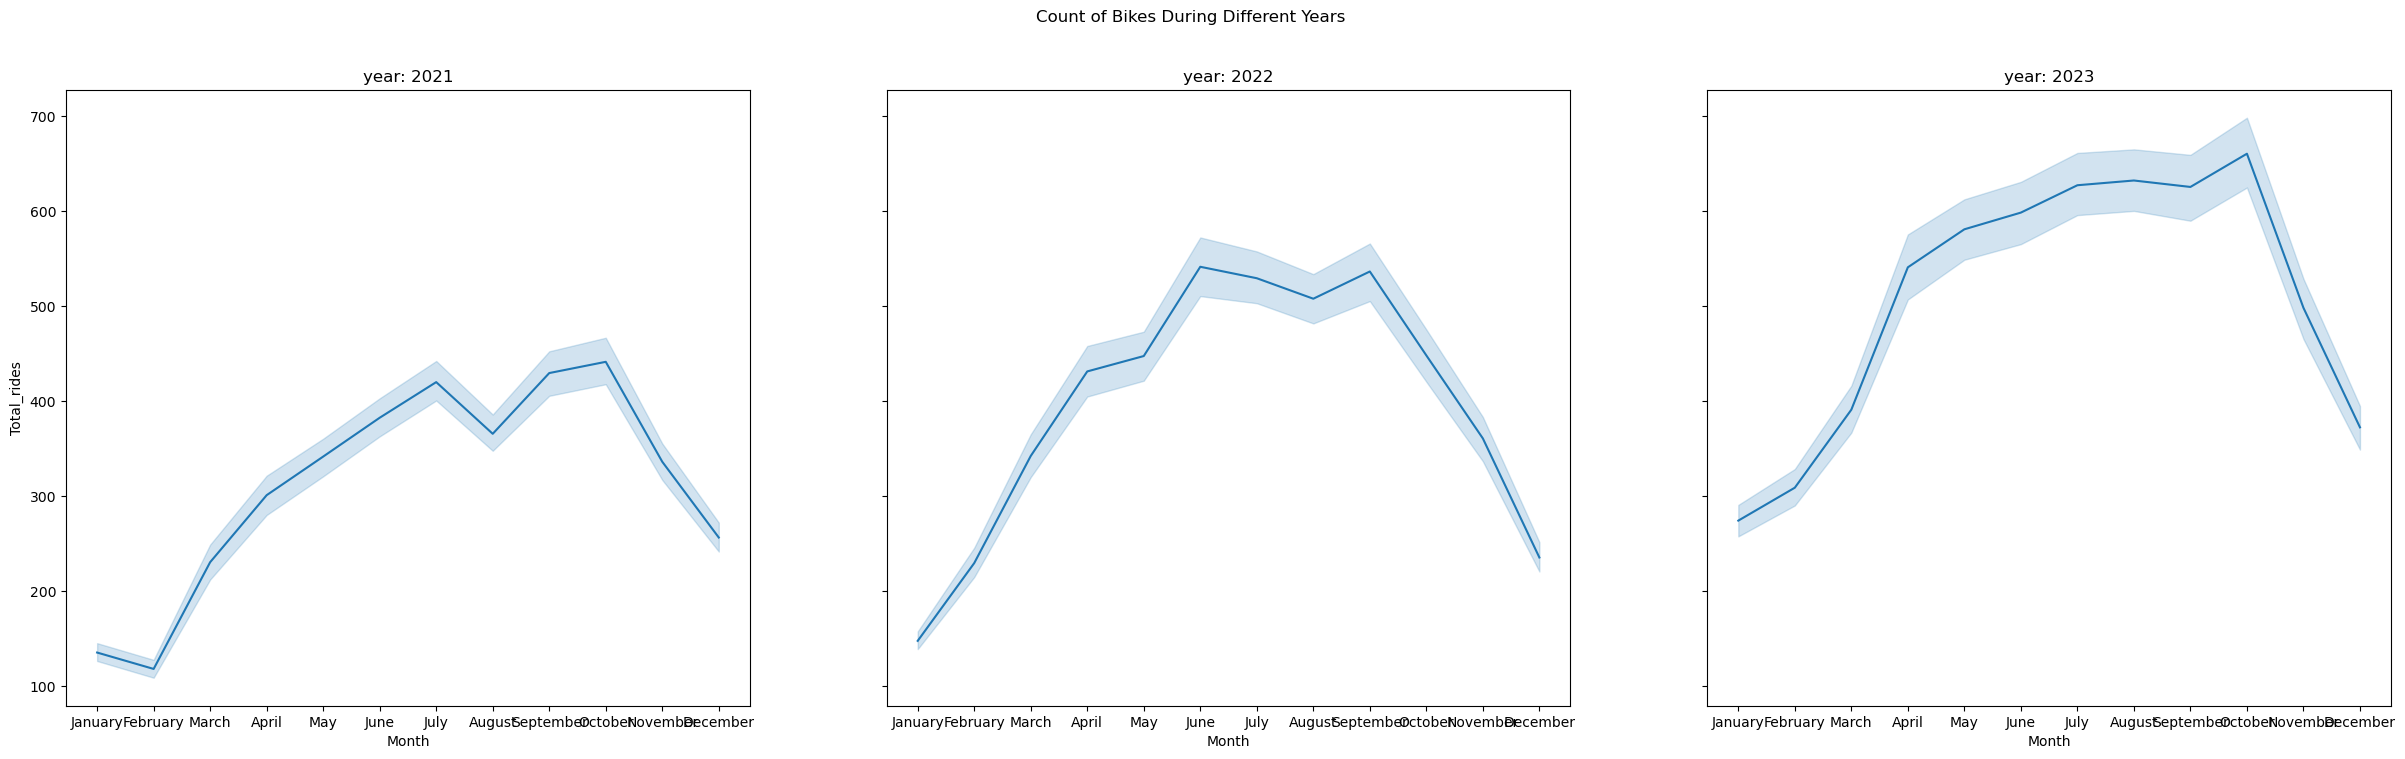

In [36]:
import matplotlib.pyplot as plt
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.lineplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'year: {year}')

plt.show()

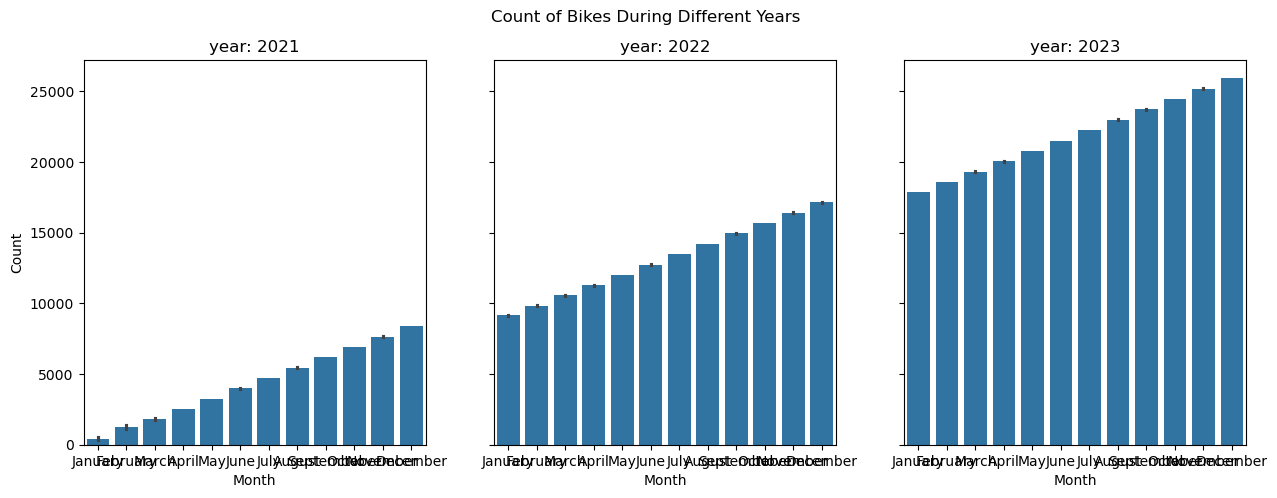

In [37]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.barplot(data=year_data, x='Month', y='Count', ax=axes[i])
    axes[i].set_title(f'year: {year}')

plt.show()

In [38]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'year', 'day of week',
       'Season', 'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day', 'month_year', 'weather_condition'],
      dtype='object')

Season distribution

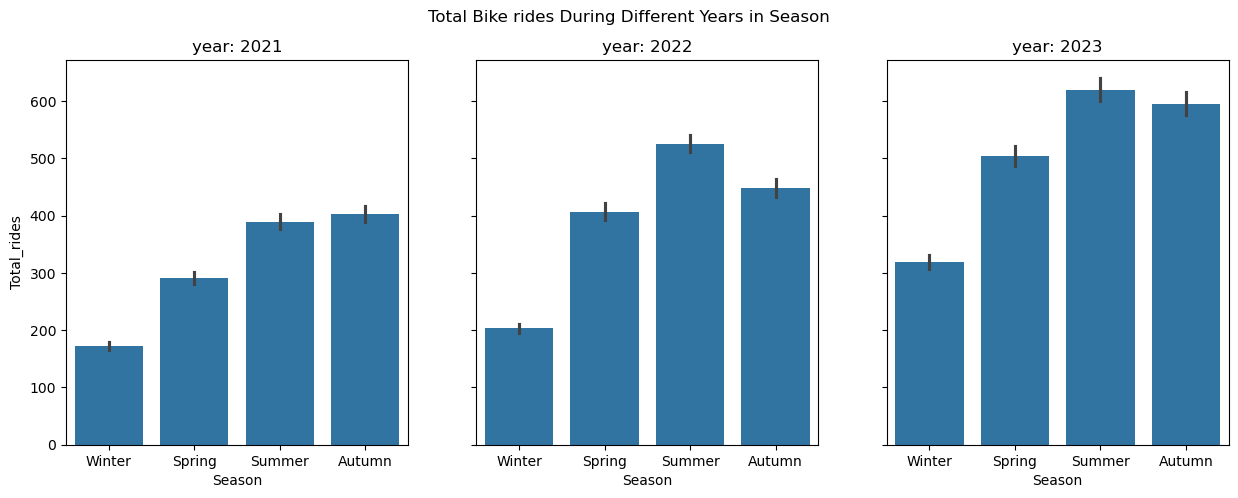

In [39]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Total Bike rides During Different Years in Season')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.barplot(data=year_data, x='Season', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'year: {year}')

plt.show()


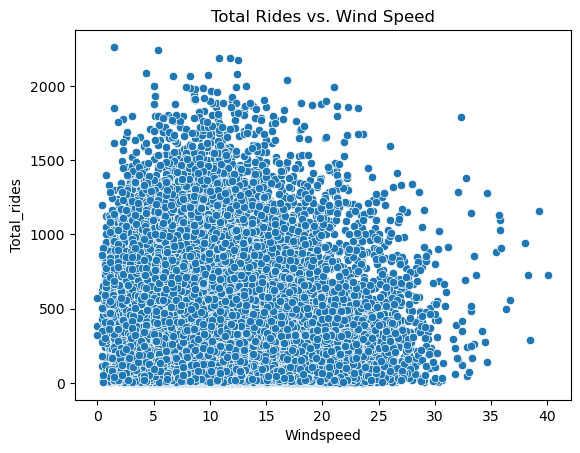

In [40]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.scatterplot(x='Windspeed', y='Total_rides', data=dfH)
plt.title('Total Rides vs. Wind Speed')
plt.show()

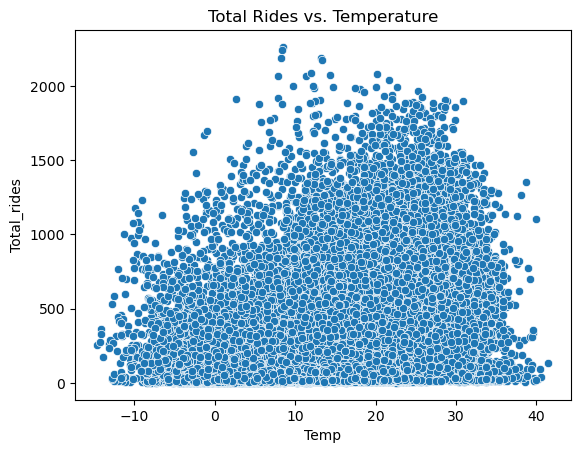

In [41]:

# Scatter plot: Total_rides vs. temperature_2m_mean
sns.scatterplot(x='Temp', y='Total_rides', data=dfH)
plt.title('Total Rides vs. Temperature')
plt.show()

In [42]:
dfH.head()

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   
3     9.0 2021-01-01     3     7.0         16.0        81   1.6        2   
4     7.0 2021-01-01     4     5.0         12.0        77   1.6        2   

   Windspeed  Count  ...  year  day of week  Season day_of_week  is_weekday  \
0       10.2      0  ...  2021       Friday  Winter           4        True   
1       10.0      1  ...  2021       Friday  Winter           4        True   
2       10.1      2  ...  2021       Friday  Winter           4        True   
3       10.6      3  ...  2021       Friday  Winter           4        True   
4        9.9      4  ...  2021       Friday  Winter           4        True   

   is_weekend  is_holiday  is_working_day  month_year weather_condition  
0       False       False            True     2021-01            cloudy  
1       False       False            True     2021-01            cloudy  
2       False       False            True     2021-01            cloudy  
3       False       False            True     2021-01            cloudy  
4       False       False            True     2021-01            cloudy  

[5 rows x 21 columns]

Hourly distribution

Text(0.5, 1.0, 'Hourly Distribution of Bike Rentals')

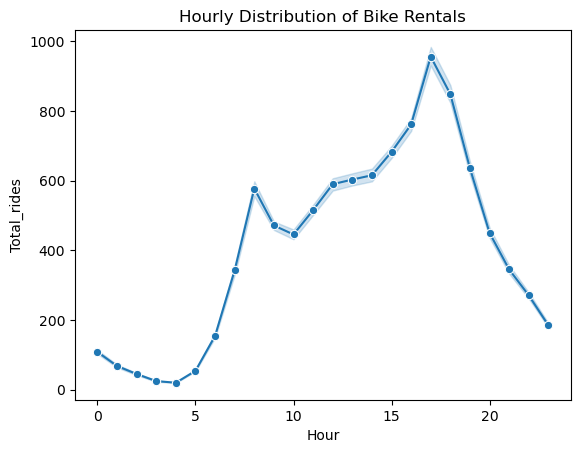

In [43]:
# Hourly distribution
sns.lineplot(x='Hour', y='Total_rides', data=dfH, marker='o')
plt.title('Hourly Distribution of Bike Rentals')


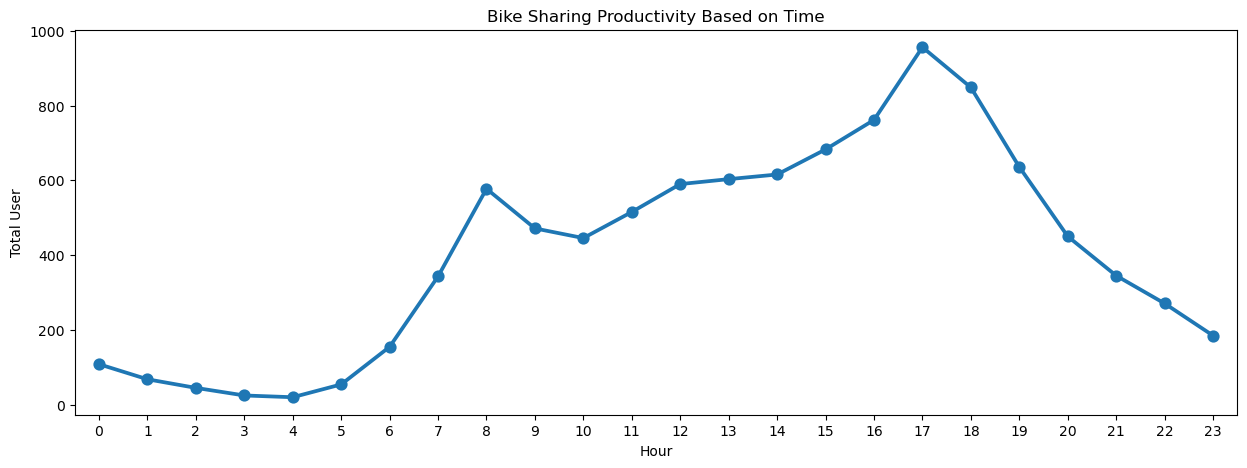

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=dfH, x='Hour', y='Total_rides', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity Based on Time')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

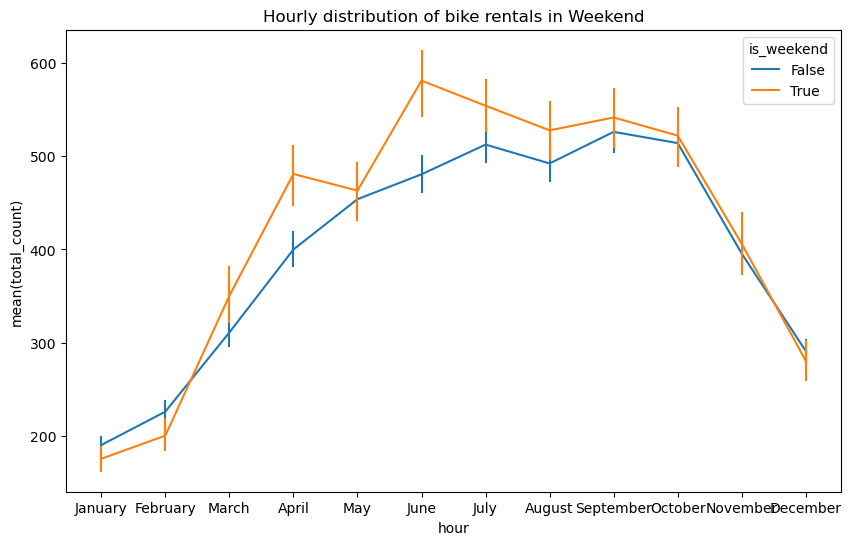

In [45]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Month', y='Total_rides', data=dfH, hue='is_weekend', estimator='mean',err_style="bars")

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weekend')
plt.xlabel('hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

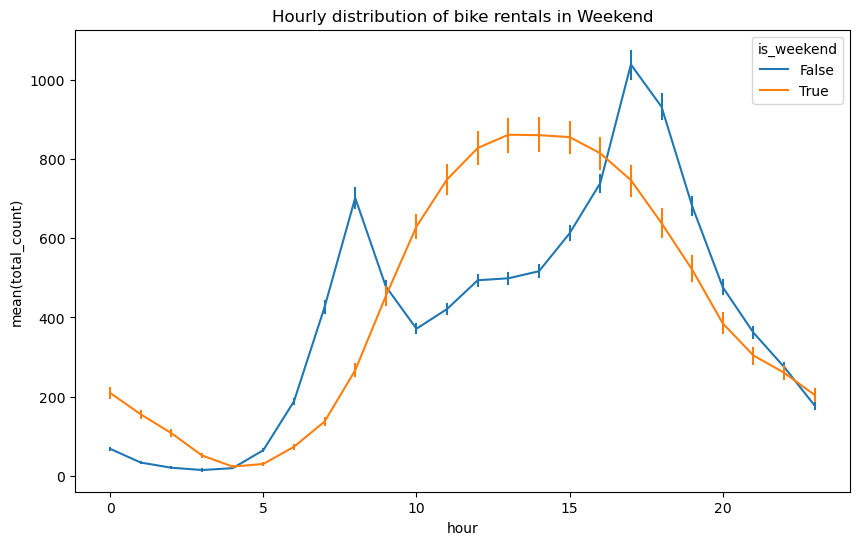

In [46]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='is_weekend', estimator='mean',err_style="bars")

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weekend')
plt.xlabel('hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

[Text(0.5, 1.0, 'Bike Rides during Hours: Casual')]

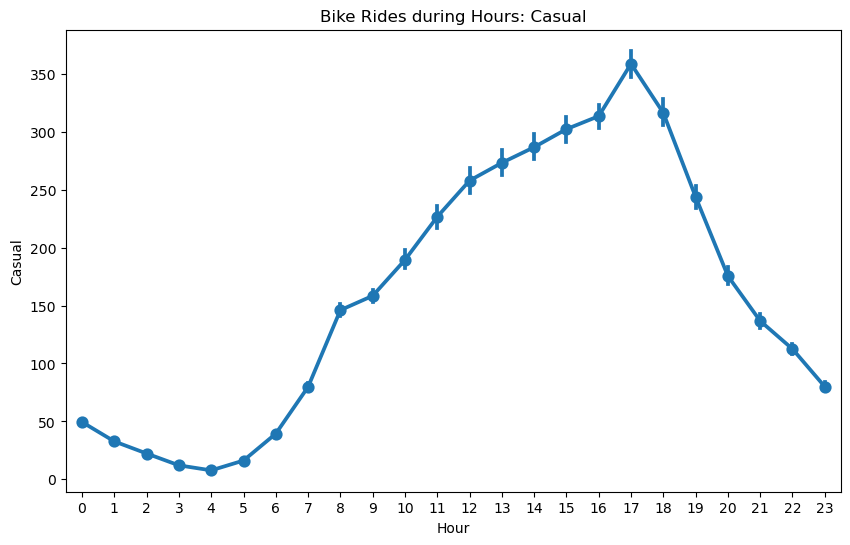

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=dfH, x='Hour', y='Casual', ax=ax)
ax.set(title='Bike Rides during Hours: Casual')

[Text(0.5, 1.0, ' Bike Ride during Hour: Members')]

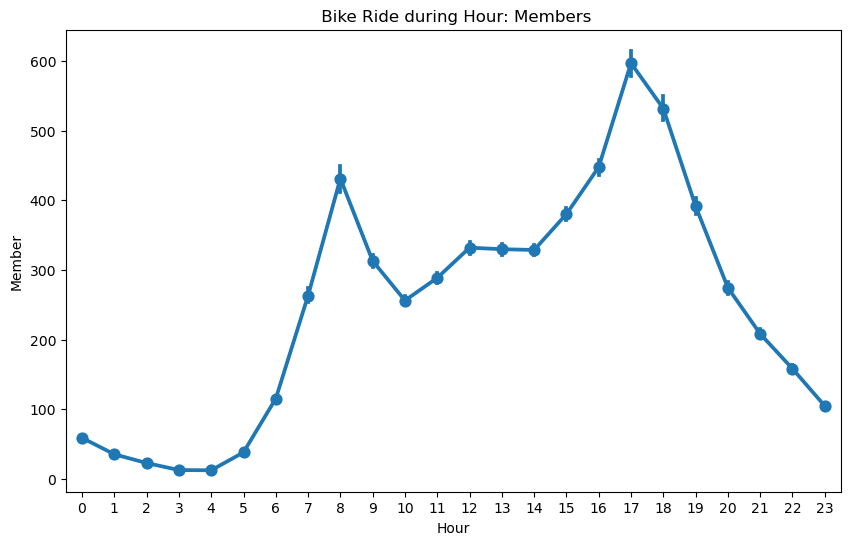

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=dfH, x='Hour', y='Member', ax=ax)
ax.set(title=' Bike Ride during Hour: Members')

Monthly distribution

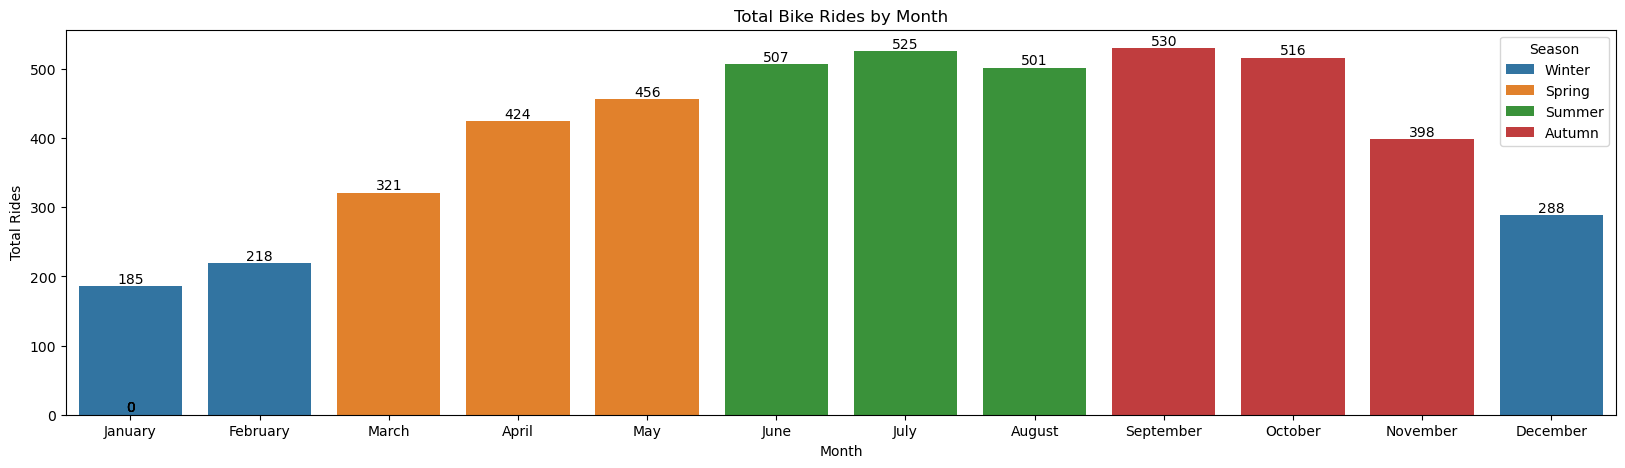

In [49]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=dfH, x='Month', y='Total_rides', hue= 'Season', errorbar=None, ax=ax)
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')
ax.set(title='Total Bike Rides by Month')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Month')
plt.show()

Yearly distribution

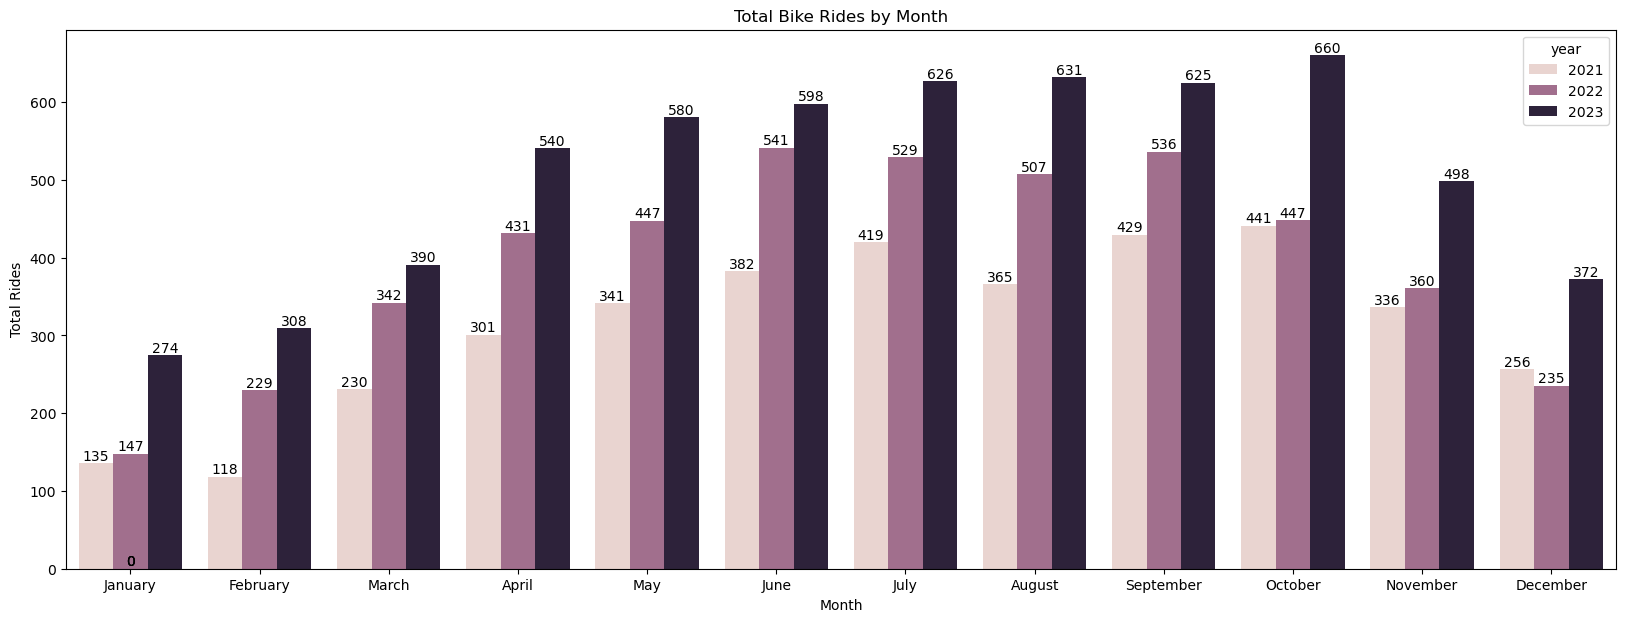

In [50]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=dfH, x='Month', y='Total_rides', hue= 'year', errorbar=None, ax=ax)
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')
ax.set(title='Total Bike Rides by Month')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Month')
plt.show()

Yearly distribution in Season

[Text(0.5, 1.0, 'Toatl Bike Rides during different Season')]

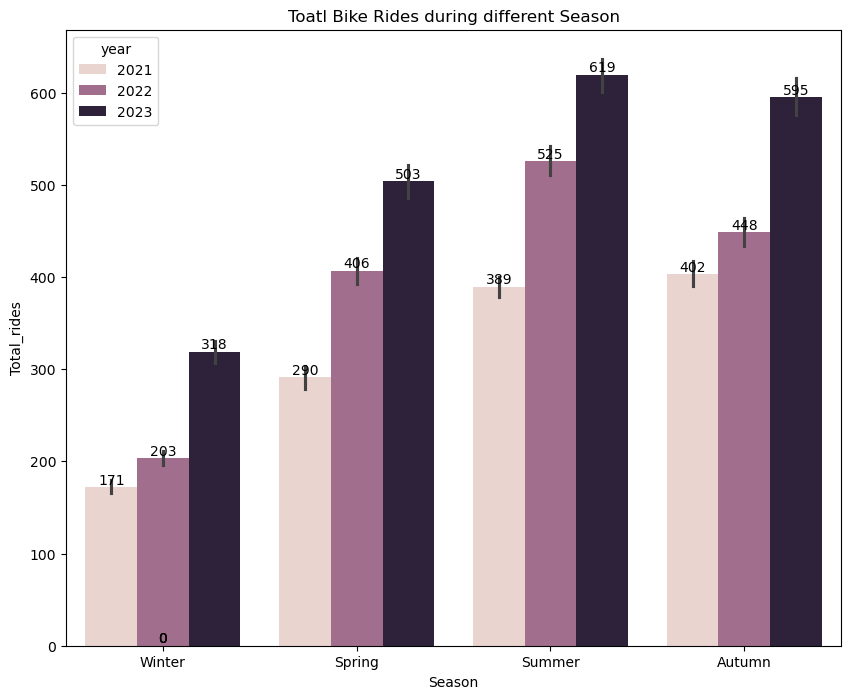

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dfH, x='Season', y='Total_rides', hue= 'year', ax=ax)
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')
ax.set(title='Toatl Bike Rides during different Season')

Define rush hour periods based on data

In [52]:
# Define morning and evening rush hour periods
morning_rush_hours = (8, 10)  # Morning: 8 AM - 10 AM
evening_rush_hours = (17, 19)  # Evening: 5 PM - 7 PM

def categorize_hour(hour):
    """Classifies the given hour as 'Morning Rush Hour', 'Evening Rush Hour', or 'Weak Hour'."""
    if morning_rush_hours[0] <= hour <= morning_rush_hours[1]:
        return 'Morning Rush Hour'
    elif evening_rush_hours[0] <= hour <= evening_rush_hours[1]:
        return 'Evening Rush Hour'
    else:
        return 'Weak Hour'

# Apply the function to classify each hour in the dataset
dfH['Time_Category'] = dfH['Hour'].apply(categorize_hour)
dfH.head(2)


Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   

   Windspeed  Count  ... day of week  Season day_of_week is_weekday  \
0       10.2      0  ...      Friday  Winter           4       True   
1       10.0      1  ...      Friday  Winter           4       True   

   is_weekend  is_holiday  is_working_day  month_year  weather_condition  \
0       False       False            True     2021-01             cloudy   
1       False       False            True     2021-01             cloudy   

  Time_Category  
0     Weak Hour  
1     Weak Hour  

[2 rows x 22 columns]

In [53]:
# # Define morning and evening rush hour periods
# morning_rush_hours = (8, 10)  # Morning: 8 AM - 10 AM
# evening_rush_hours = (17, 19)  # Evening: 5 PM - 7 PM

# def categorize_hour(hour):
#     """Classifies the given hour as 'Rush Hour' or 'Weak Hour'."""
#     if morning_rush_hours[0] <= hour <= morning_rush_hours[1] or evening_rush_hours[0] <= hour <= evening_rush_hours[1]:
#         return 'Evening Rush Hour'
#     return 'Morning Rush Hour'

# # Apply the function to classify each hour in the dataset
# dfH['Rush_Hour_Category'] = dfH['Hour'].apply(categorize_hour)
# dfH.head(2)


In [54]:
# Define rush hour periods (you can customize these based on your data)
rush_hours = [(8,18)]  # Morning and evening rush hours
def is_rush_hour(hour):
    for start, end in rush_hours:
      if start <= hour <= end:
        return 'Rush Hour'
    return 'Weak Hour'

# Apply the is_rush_hour function to the 'Hour' column and create a new 'Rush_Hour' column
dfH['Rush_Hour and Weak_hour'] = dfH['Hour'].apply(is_rush_hour)


Rush and Weak Hour Distribution in Yearly

[Text(0.5, 1.0, 'Total Bike Rides during different Hours')]

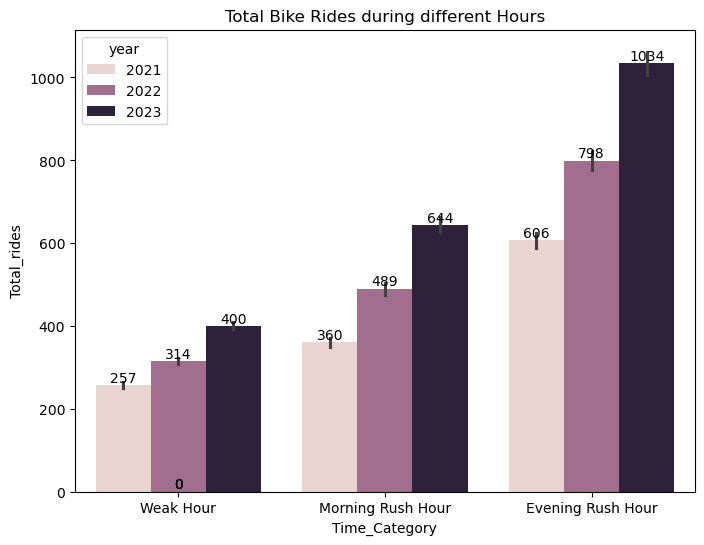

In [55]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfH, x='Time_Category', y='Total_rides', hue= 'year', ax=ax)
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')
ax.set(title='Total Bike Rides during different Hours')

[Text(0.5, 1.0, 'Total Bike Rides during different Hours')]

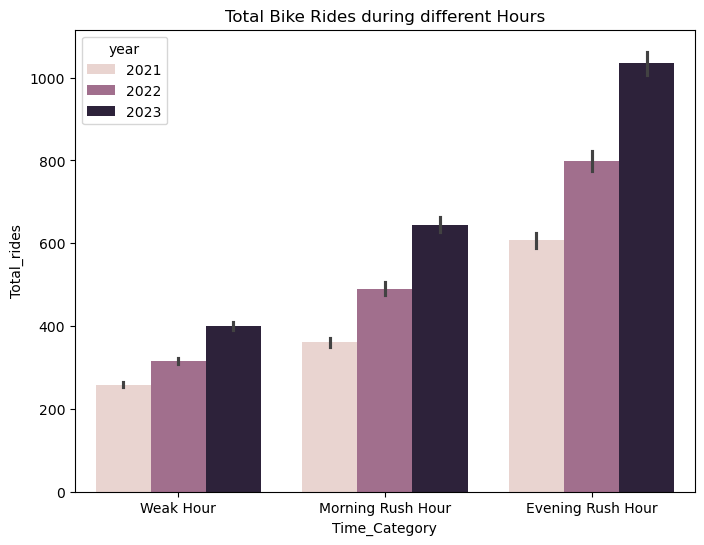

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfH, x='Time_Category', y='Total_rides', hue= 'year', ax=ax)
ax.set(title='Total Bike Rides during different Hours')

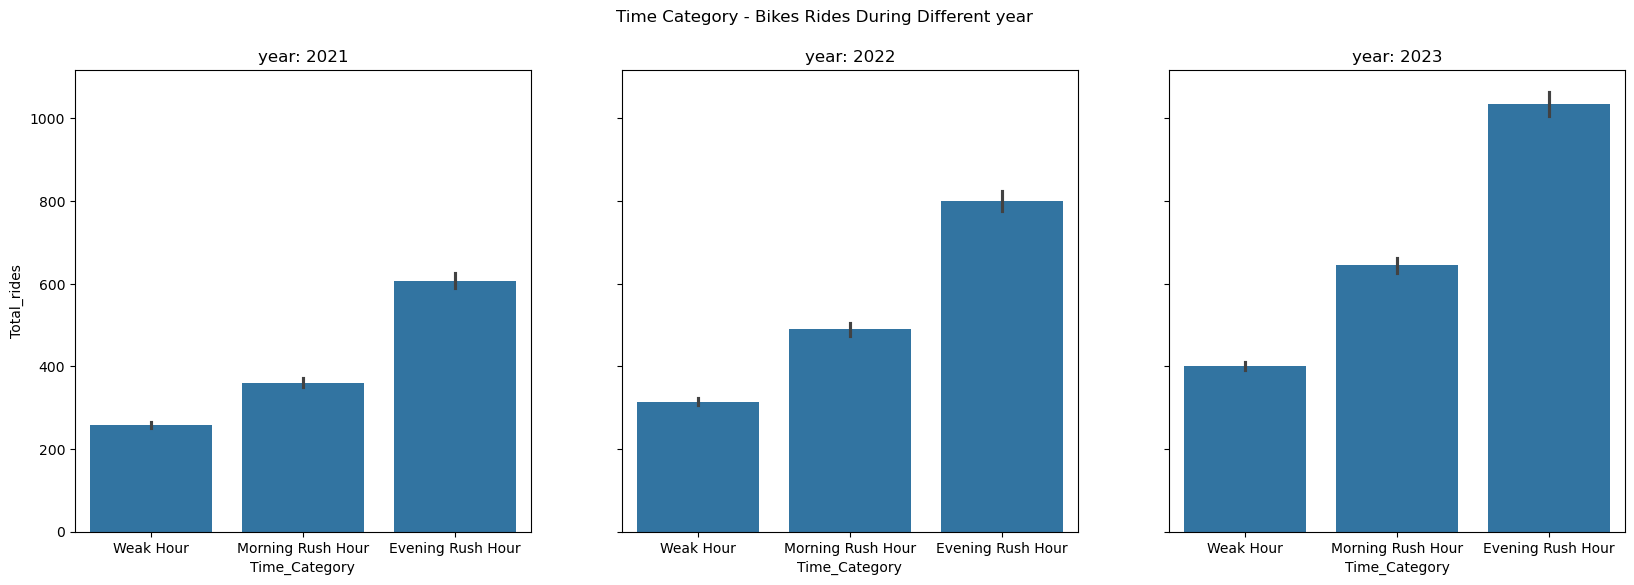

In [57]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6),  sharey=True)
fig.suptitle('Time Category - Bikes Rides During Different year')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.barplot(data=year_data, x='Time_Category', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'year: {year}')

plt.show()

Weekly Distribution

[Text(0.5, 1.0, 'Total Bike Rides during Weekdays')]

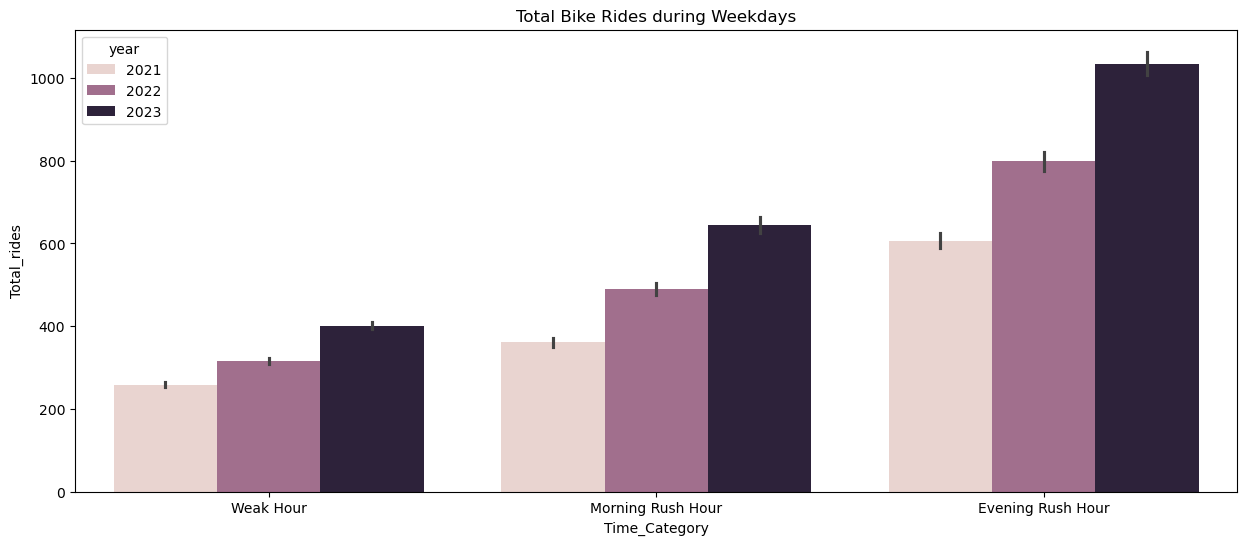

In [58]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=dfH, x='Time_Category', y='Total_rides', hue= 'year', ax=ax)
ax.set(title='Total Bike Rides during Weekdays')

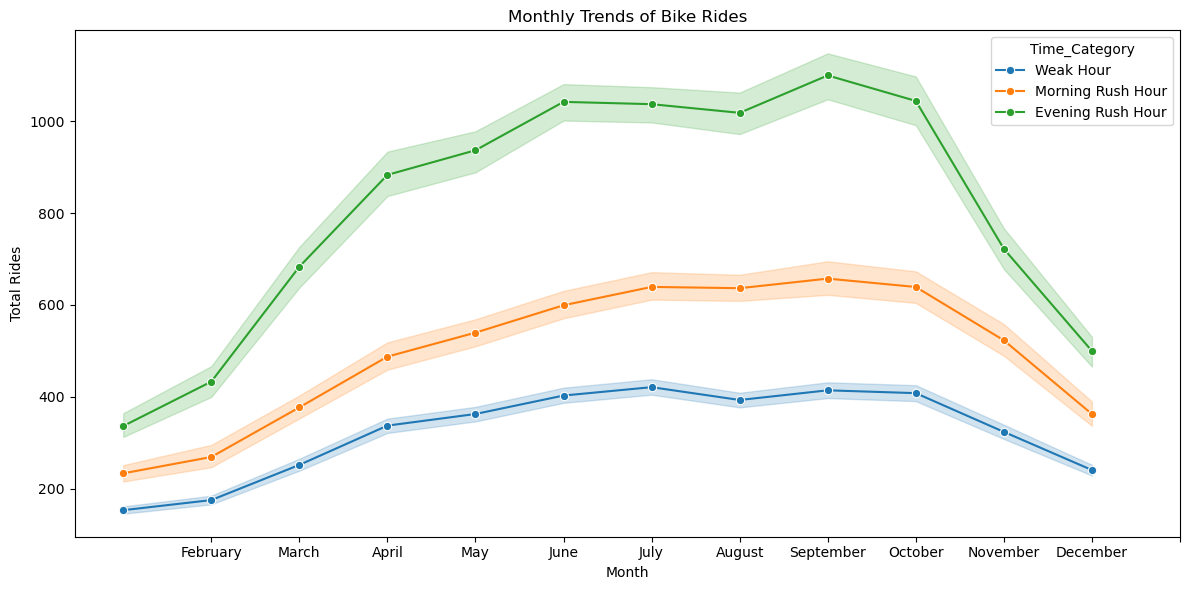

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_rides', hue='Time_Category', data=dfH, marker='o')
plt.title('Monthly Trends of Bike Rides')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(range(1, 13)) # Set x-axis ticks for each month
plt.tight_layout()
plt.show()

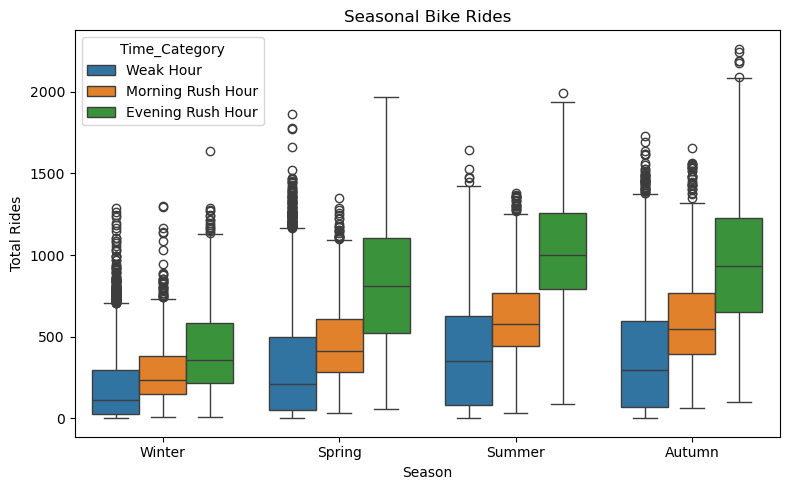

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Season', y='Total_rides', hue='Time_Category', data=dfH)
plt.title('Seasonal Bike Rides')
plt.xlabel('Season')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Total Bike Rides during Weekdays')]

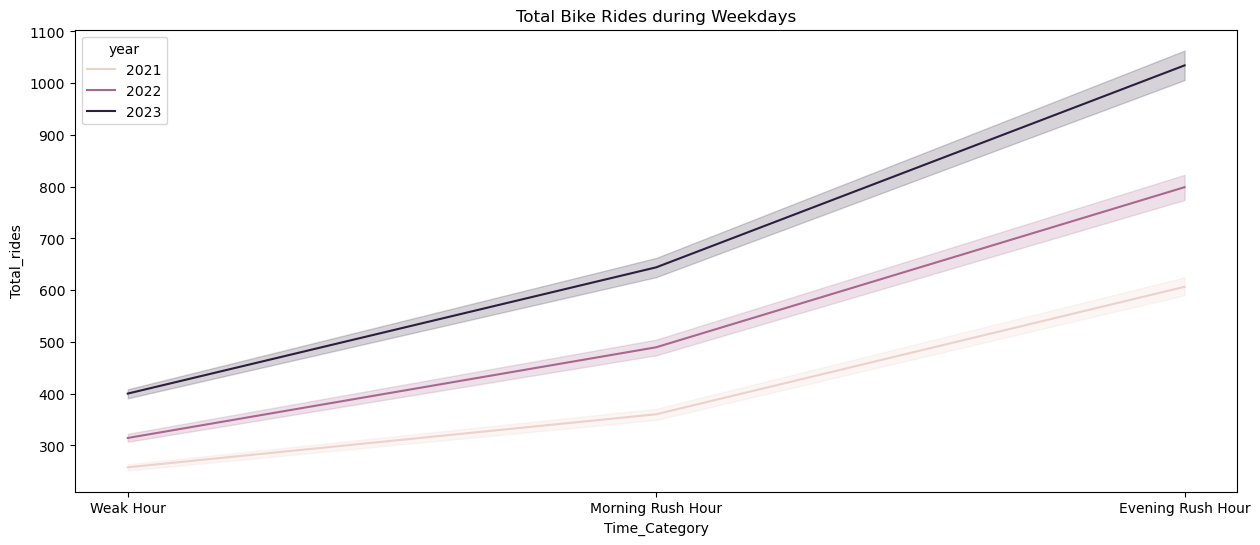

In [61]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=dfH, x='Time_Category', y='Total_rides', hue= 'year', ax=ax)
ax.set(title='Total Bike Rides during Weekdays')

[Text(0.5, 1.0, 'Total Bike Rides during Weekdays')]

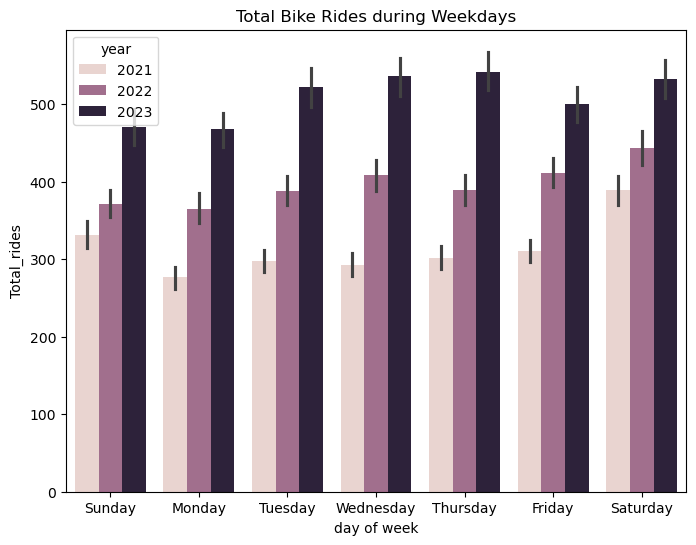

In [62]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfH, x='day of week', y='Total_rides', hue= 'year', ax=ax ,order=day_order)
ax.set(title='Total Bike Rides during Weekdays')

Rush and Weak Hour Distribution in Yearly - Diff Ways of Analyse

[Text(0.5, 1.0, 'Total Bike Rides during Rush_Hour Category')]

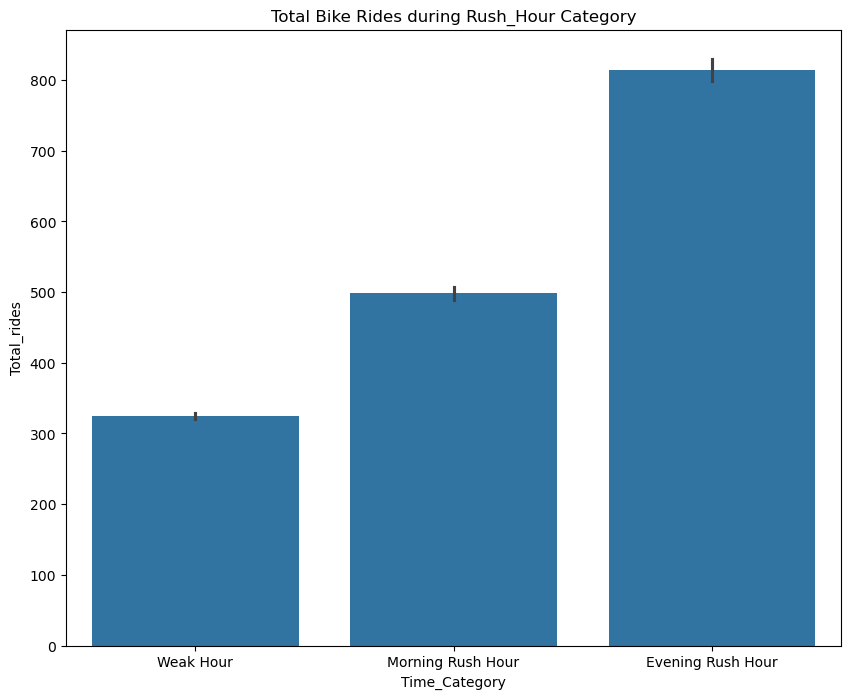

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dfH, x='Time_Category', y='Total_rides', ax=ax)
ax.set(title='Total Bike Rides during Rush_Hour Category')

[Text(0.5, 1.0, 'Total Bike Rides during Rush_Hour and Weak_hour')]

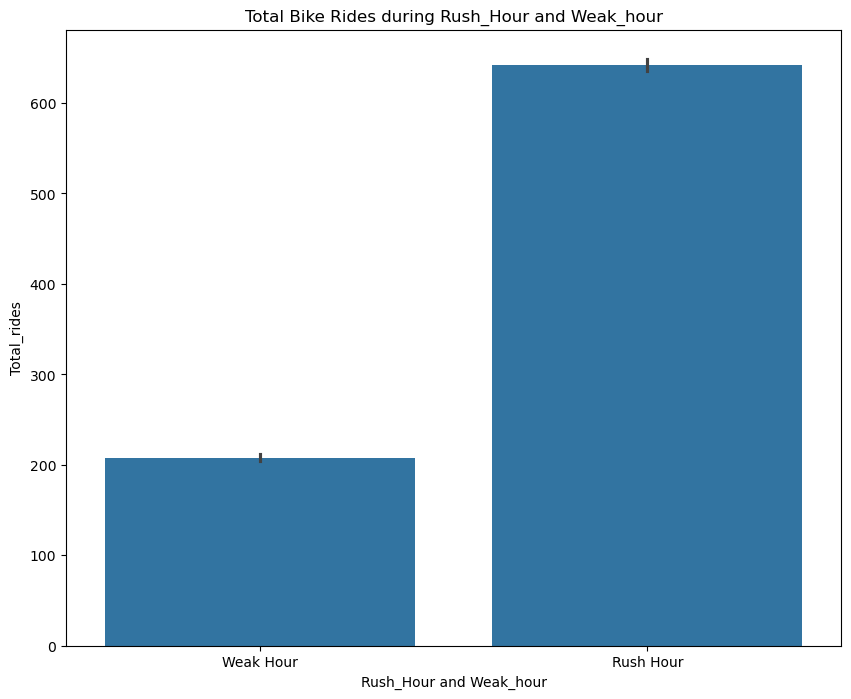

In [64]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dfH, x='Rush_Hour and Weak_hour', y='Total_rides', ax=ax)
ax.set(title='Total Bike Rides during Rush_Hour and Weak_hour')

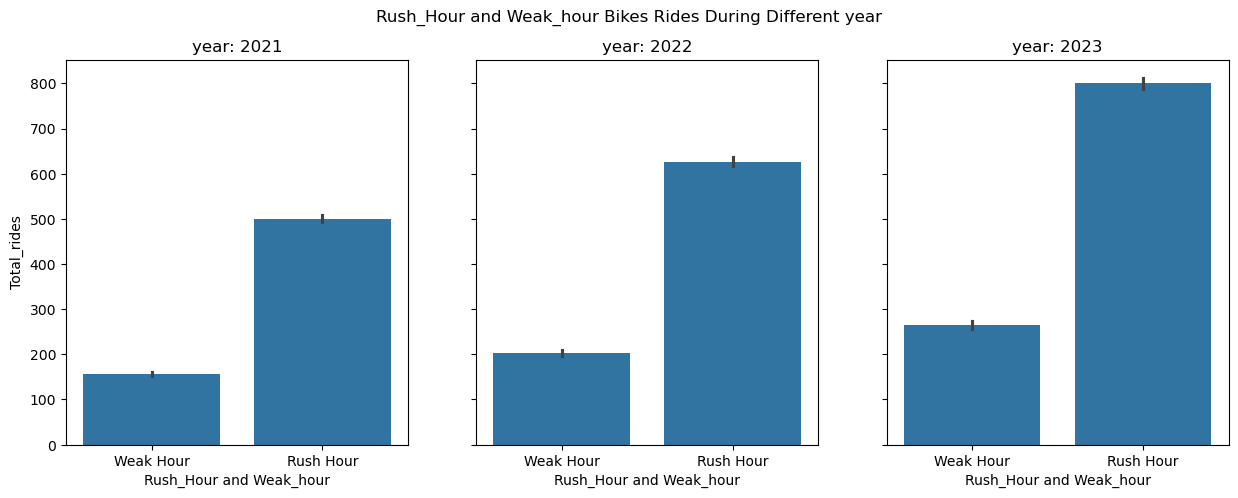

In [65]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Rush_Hour and Weak_hour Bikes Rides During Different year')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.barplot(data=year_data, x='Rush_Hour and Weak_hour', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'year: {year}')

plt.show()

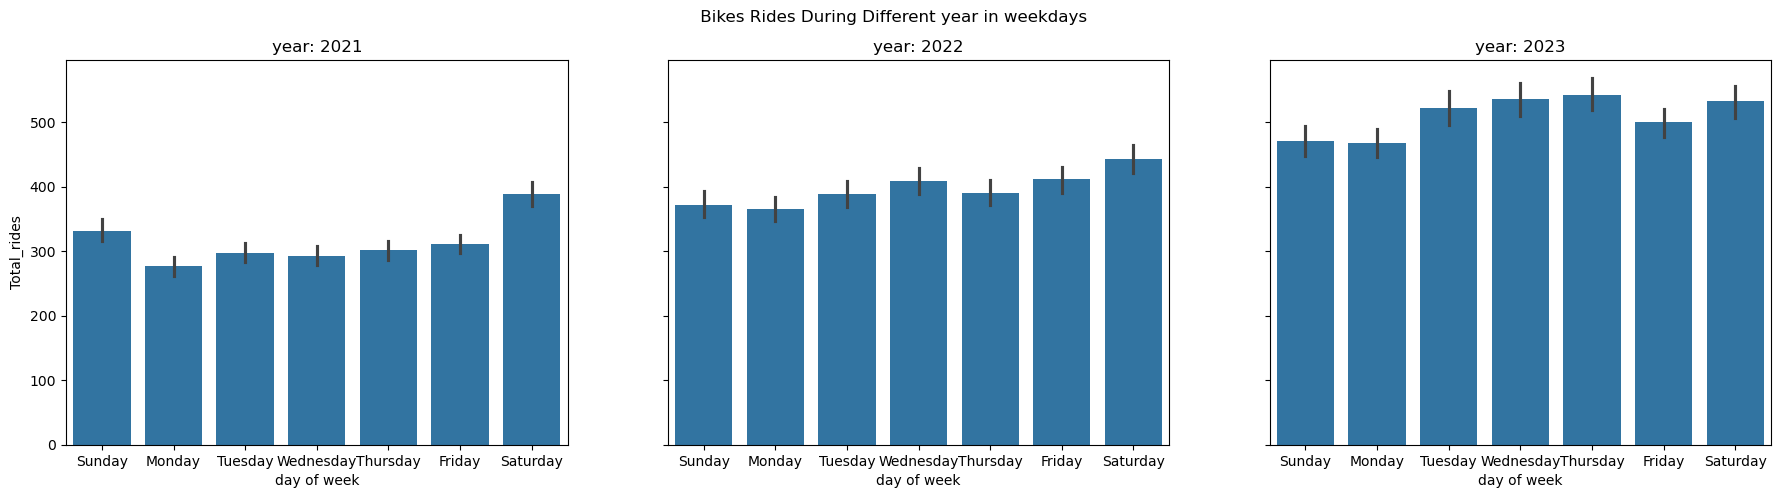

In [66]:
# Create separate subplots for each year
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5),  sharey=True)
fig.suptitle(' Bikes Rides During Different year in weekdays')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.barplot(data=year_data, x='day of week', y='Total_rides', ax=axes[i], order=day_order)
    axes[i].set_title(f'year: {year}')

plt.show()

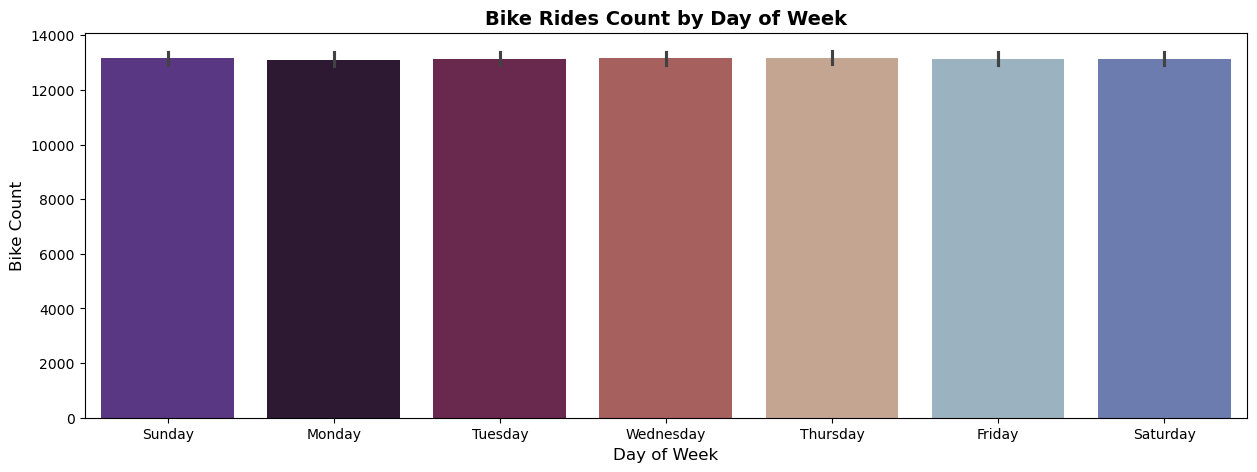

Count of Bike Count by Day of Week:
day of week
Friday       3768
Saturday     3768
Sunday       3768
Monday       3744
Tuesday      3744
Wednesday    3744
Thursday     3744
Name: count, dtype: int64


In [67]:
# Displaying the most common bike rides count by day of week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(15,5))
sns.barplot(x="day of week", y="Count", hue="day of week", legend=False, data=dfH, palette="twilight", order=day_order)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Day of Week", fontsize=14, fontweight='bold')
plt.show()

print('Count of Bike Count by Day of Week:')
print(dfH['day of week'].value_counts())

In [68]:
dfH.head(2)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   

   Windspeed  Count  ...  Season  day_of_week is_weekday is_weekend  \
0       10.2      0  ...  Winter            4       True      False   
1       10.0      1  ...  Winter            4       True      False   

   is_holiday  is_working_day  month_year  weather_condition  Time_Category  \
0       False            True     2021-01             cloudy      Weak Hour   
1       False            True     2021-01             cloudy      Weak Hour   

  Rush_Hour and Weak_hour  
0               Weak Hour  
1               Weak Hour  

[2 rows x 23 columns]

<Axes: >

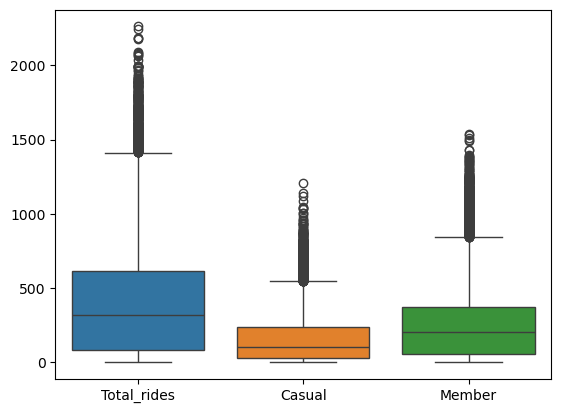

In [69]:
fig = plt.subplot()
sns.boxplot(data=dfH[['Total_rides', 'Casual', 'Member']])

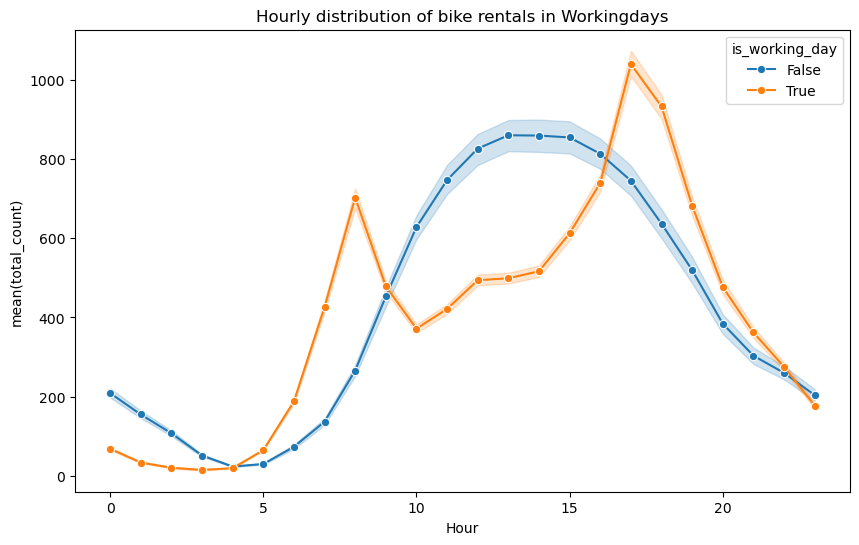

In [70]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='is_working_day', estimator='mean', marker='o')

# Add title and labels
plt.title('Hourly distribution of bike rentals in Workingdays')
plt.xlabel('Hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

In [71]:
dfH.head(3)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   

   Windspeed  Count  ...  Season  day_of_week is_weekday is_weekend  \
0       10.2      0  ...  Winter            4       True      False   
1       10.0      1  ...  Winter            4       True      False   
2       10.1      2  ...  Winter            4       True      False   

   is_holiday  is_working_day  month_year  weather_condition  Time_Category  \
0       False            True     2021-01             cloudy      Weak Hour   
1       False            True     2021-01             cloudy      Weak Hour   
2       False            True     2021-01             cloudy      Weak Hour   

  Rush_Hour and Weak_hour  
0               Weak Hour  
1               Weak Hour  
2               Weak Hour  

[3 rows x 23 columns]

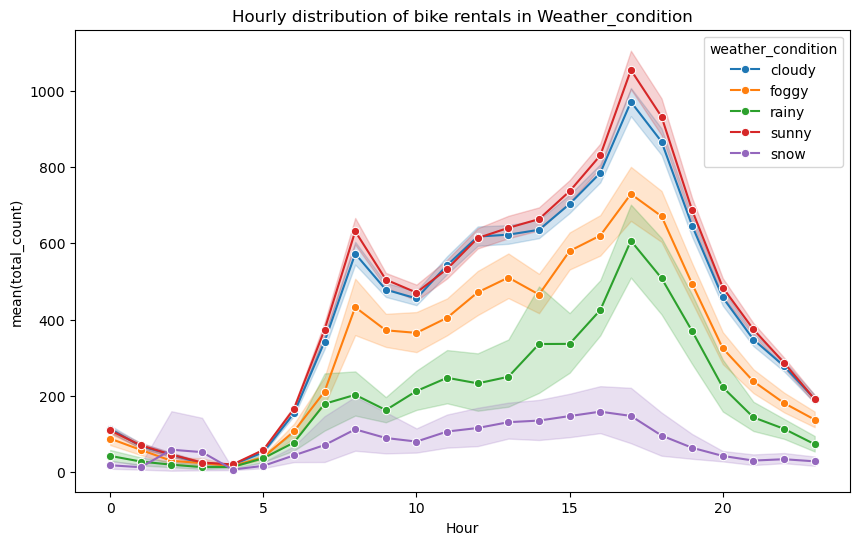

In [72]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='weather_condition', estimator='mean', marker='o')

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weather_condition')
plt.xlabel('Hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

Holiday Analysis

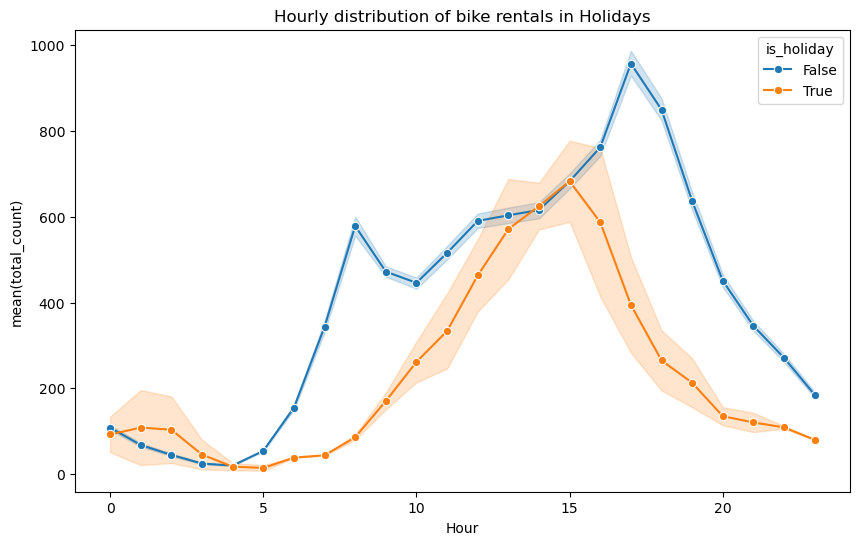

In [73]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='is_holiday', estimator='mean', marker='o')

# Add title and labels
plt.title('Hourly distribution of bike rentals in Holidays')
plt.xlabel('Hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

In [74]:
dfH['weather'].value_counts()

weather
0     11431
1      6003
3      3290
2      2507
51     1394
53      602
61      400
63      222
55      194
71      102
73       90
75       28
65       17
Name: count, dtype: int64

categorize weather codes

In [75]:
# Function to categorize weather codes
def categorize_weather_code(code):
    if code == 0:
        return 'sunny'
    elif 1 <= code <= 3:
        return 'cloudy'
    elif 51 <= code <= 55:
        return 'foggy'
    elif 61 <= code <= 65:
        return 'rainy'
    elif 71 <= code <= 75:
        return 'snow'
    else:
        return 'unknown'  # For any code that doesn't match the given categories

# Apply the function to create the new column
dfH['weather_condition'] = dfH['weather'].apply(categorize_weather_code)

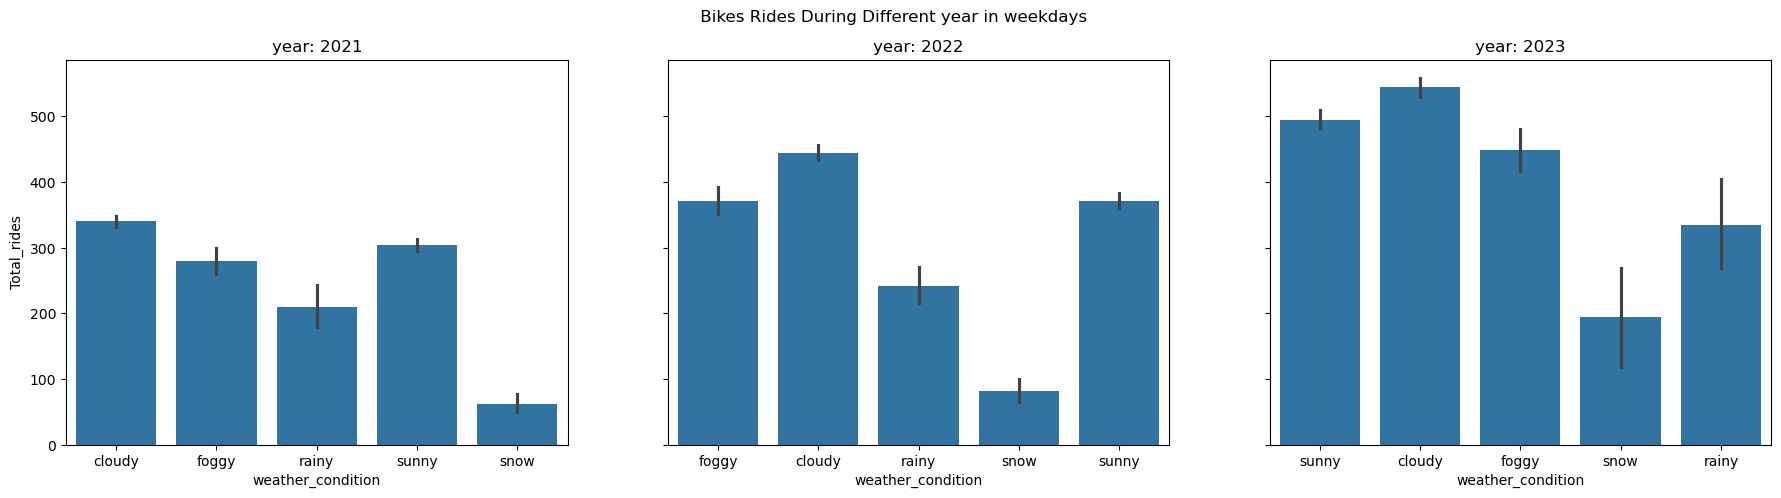

In [76]:
# Create separate subplots for each year
# day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5),  sharey=True)
fig.suptitle(' Bikes Rides During Different year in weekdays')

for i, year in enumerate(dfH['year'].unique()):
    year_data = dfH[dfH['year'] == year]
    sns.barplot(data=year_data, x='weather_condition', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'year: {year}')

plt.show()

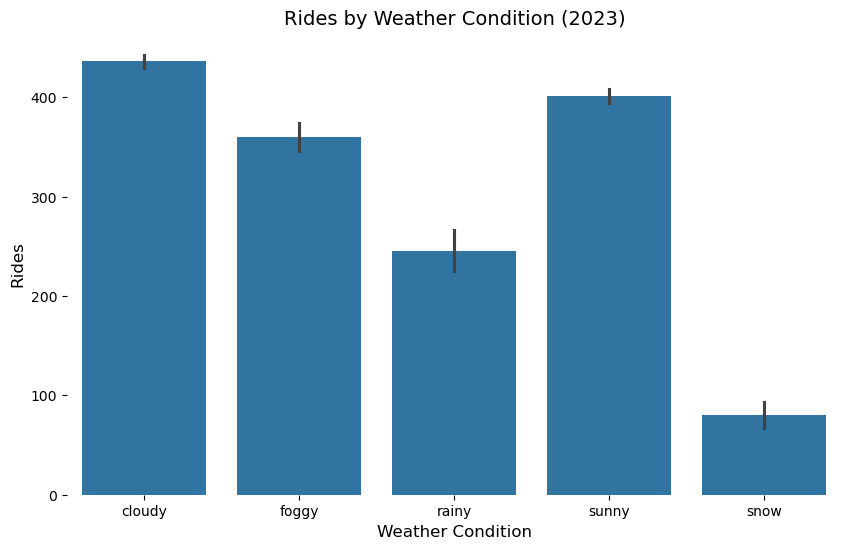

In [77]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the box plot with ordered weather_condition categories and custom palette
sns.barplot(x='weather_condition', y='Total_rides', data=dfH)
# Remove all spines (borders) for a cleaner look
sns.despine(left=True, bottom=True, right=True, top=True)

# Set the title and labels of the plot
plt.title('Rides by Weather Condition (2023)', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Rides', fontsize=12)

# Display the plot
plt.show()

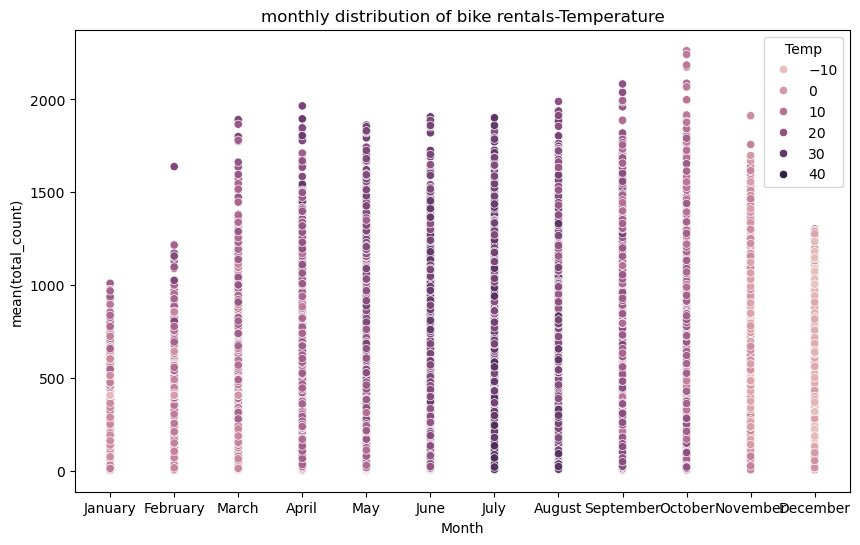

In [78]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.scatterplot(x='Month', y='Total_rides', data=dfH, hue='Temp')

# Add title and labels
plt.title('monthly distribution of bike rentals-Temperature')
plt.xlabel('Month')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

In [79]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'year', 'day of week',
       'Season', 'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day', 'month_year', 'weather_condition', 'Time_Category',
       'Rush_Hour and Weak_hour'],
      dtype='object')

In [80]:
# # Aggregate data by month and user type
# user_type_counts = dfH.groupby(['Month', 'Member', 'Casual']).size().reset_index(name='count')

# # Create the plot
# plt.figure(figsize=(17, 7))

# # Plot user type rides with hue for 'member1_casual2' and set custom colors
# sns.lineplot(data=user_type_counts, x='Month', y='count', hue='User_type', linewidth=4, marker='o', markersize=12, palette={'member': 'blue', 'casual': 'lightskyblue'})

# # Set title and legend
# plt.title("Rides by Month", fontsize=18)
# plt.legend(title='User Type', loc='upper right', fontsize=12, title_fontsize='13')
# plt.show

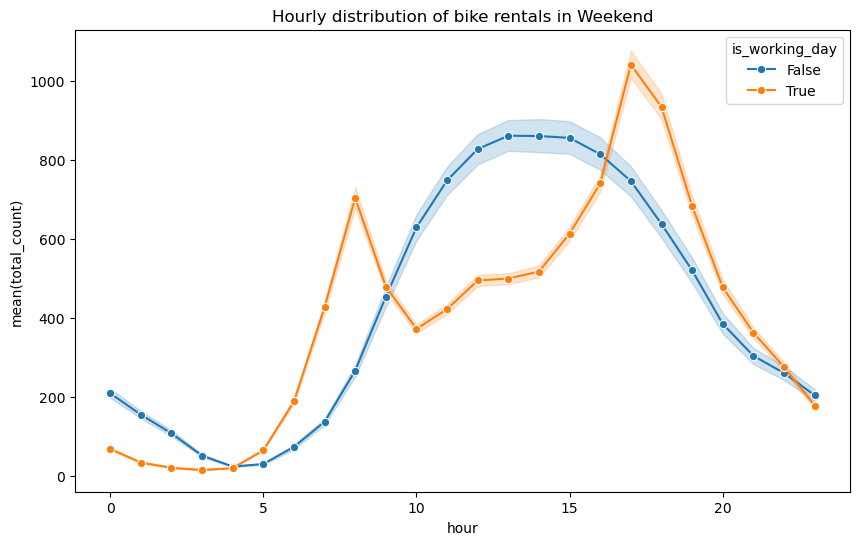

In [81]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='is_working_day', estimator='mean', marker='o')

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weekend')
plt.xlabel('hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

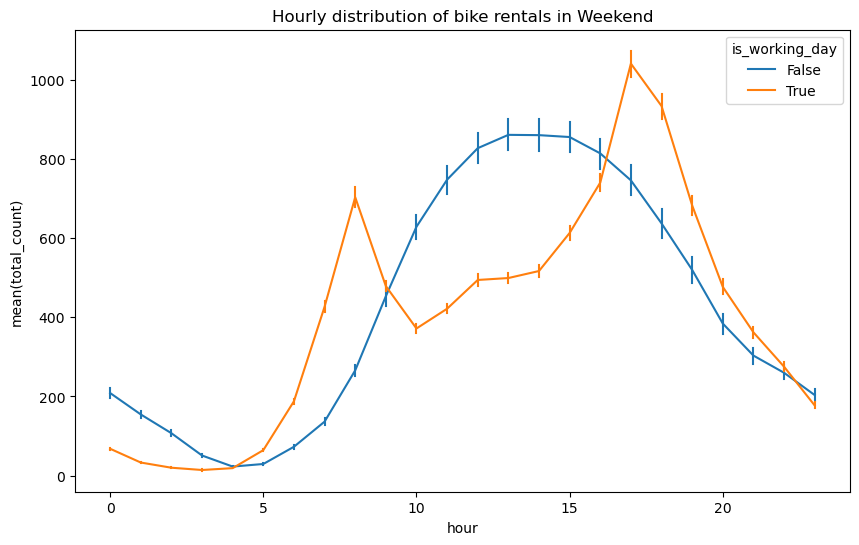

In [82]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='is_working_day', estimator='mean',err_style="bars")

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weekend')
plt.xlabel('hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

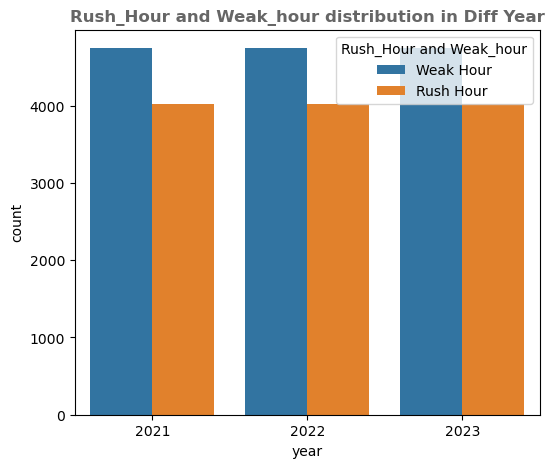

In [83]:
# plt.figure(figsize=(8,5))
fig, axes = plt.subplots( figsize=(6,5), sharey=True)
sns.countplot(x = 'year', hue = 'Rush_Hour and Weak_hour', data = dfH)
plt.title('Rush_Hour and Weak_hour distribution in Diff Year', fontweight="bold", alpha=0.6,)
plt.show()

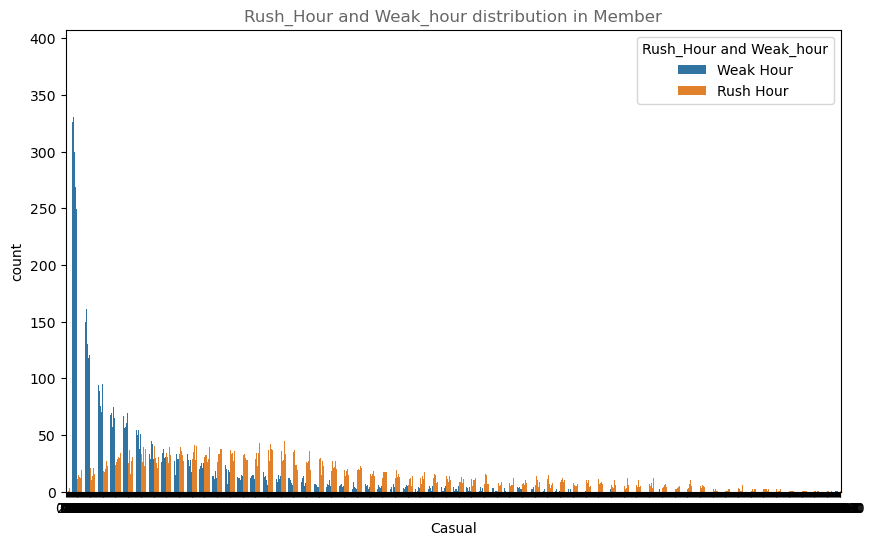

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Casual', hue = 'Rush_Hour and Weak_hour', data = dfH,)
plt.title('Rush_Hour and Weak_hour distribution in Member', alpha=0.6)
plt.show()

Text(0, 0.5, 'total_rides')

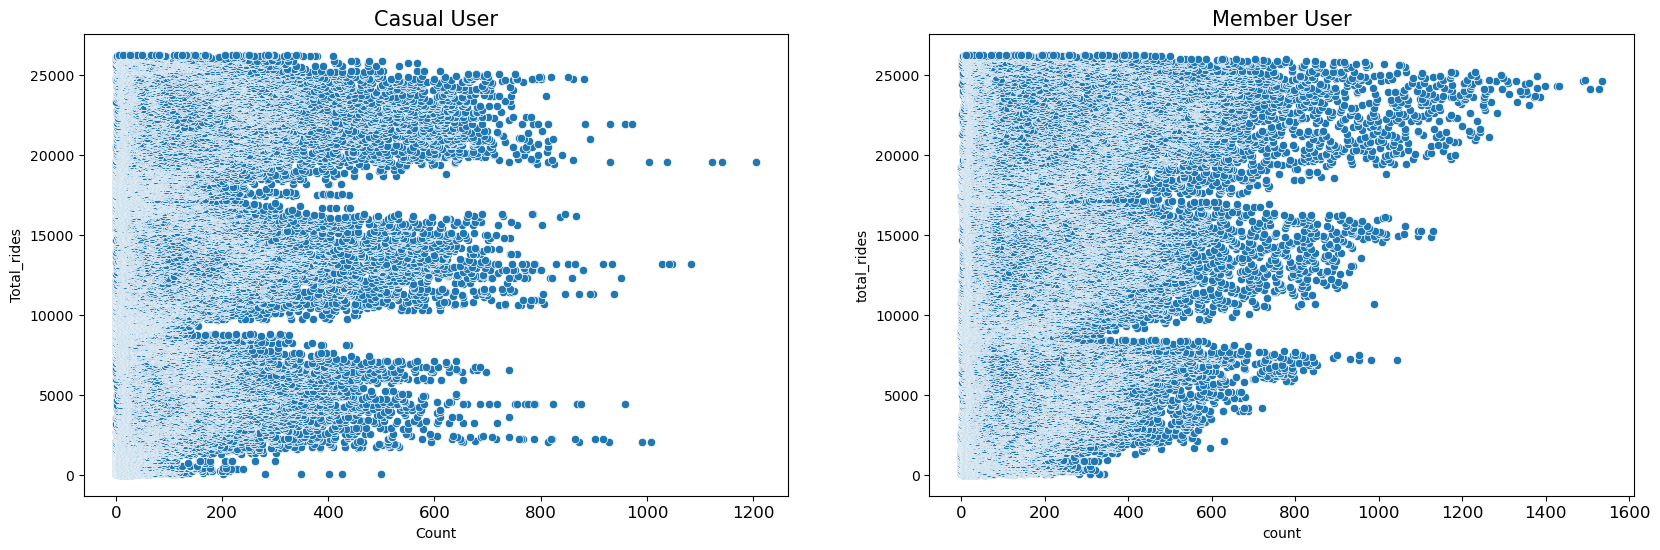

In [85]:
# Create the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Define colors
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot the first subplot (Casual User)
sns.scatterplot(x=dfH["Casual"].values, y=dfH.index, ax=ax[0]) 
ax[0].set_title("Casual User", fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Total_rides')

# Plot the first subplot (Casual User)
sns.scatterplot(x=dfH["Member"].values, y=dfH.index, ax=ax[1]) 
ax[1].set_title("Member User", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_xlabel('count')
ax[1].set_ylabel('total_rides')

In [86]:
dfH.head(3)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   

   Windspeed  Count  ...  Season  day_of_week is_weekday is_weekend  \
0       10.2      0  ...  Winter            4       True      False   
1       10.0      1  ...  Winter            4       True      False   
2       10.1      2  ...  Winter            4       True      False   

   is_holiday  is_working_day  month_year  weather_condition  Time_Category  \
0       False            True     2021-01             cloudy      Weak Hour   
1       False            True     2021-01             cloudy      Weak Hour   
2       False            True     2021-01             cloudy      Weak Hour   

  Rush_Hour and Weak_hour  
0               Weak Hour  
1               Weak Hour  
2               Weak Hour  

[3 rows x 23 columns]

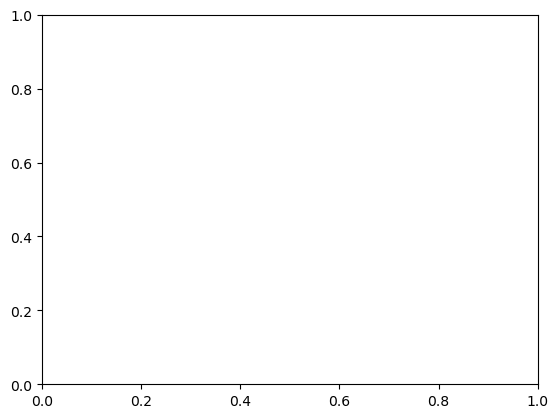

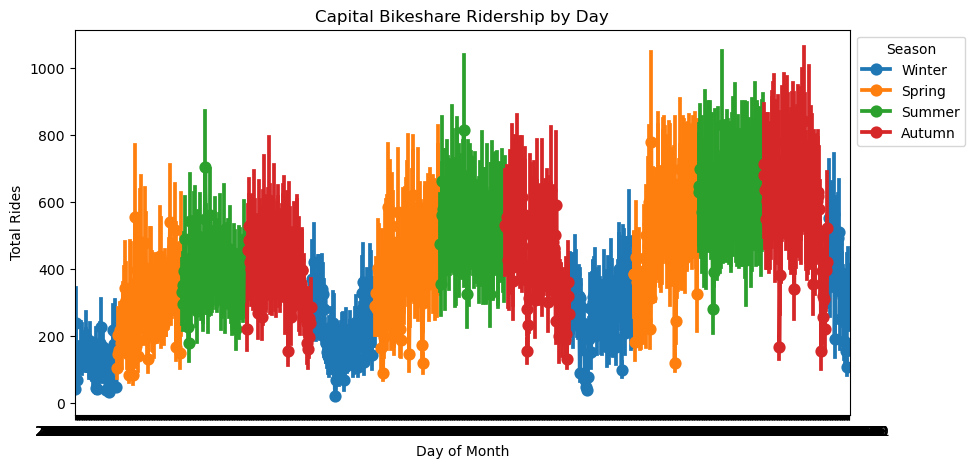

In [87]:
# dfH['day_of_month'] = dfH.Date.str[-2:]
# dfH.head()

fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=dfH[['Date', 'Total_rides', 'Season']],
            x='Date',
            y='Total_rides',
            hue='Season',
            ax=ax)

plt.title('Capital Bikeshare Ridership by Day')
plt.ylabel('Total Rides')
plt.xlabel('Day of Month')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Winter', 'Spring', 'Summer', 'Autumn'], title='Season', bbox_to_anchor=(1, 1), loc=2)

plt.show()

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

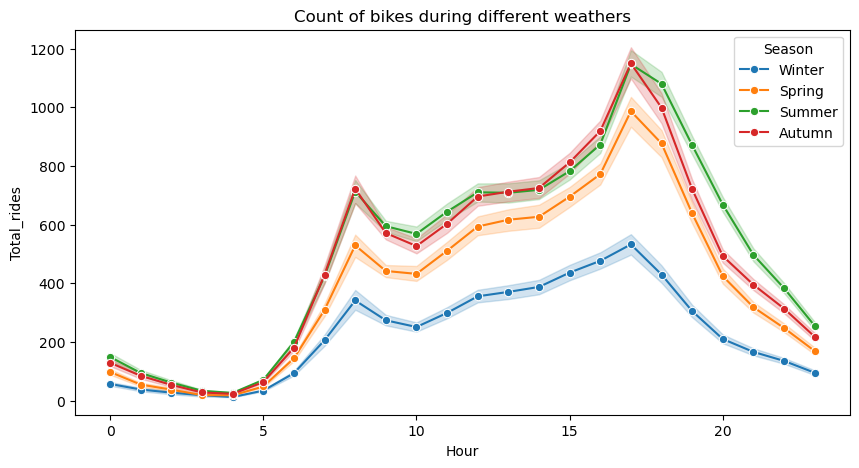

In [88]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=dfH, x='Hour', y='Total_rides', hue='Season', ax=ax, marker='o')
ax.set(title='Count of bikes during different weathers')


[Text(0.5, 1.0, 'Count of bikes during different months')]

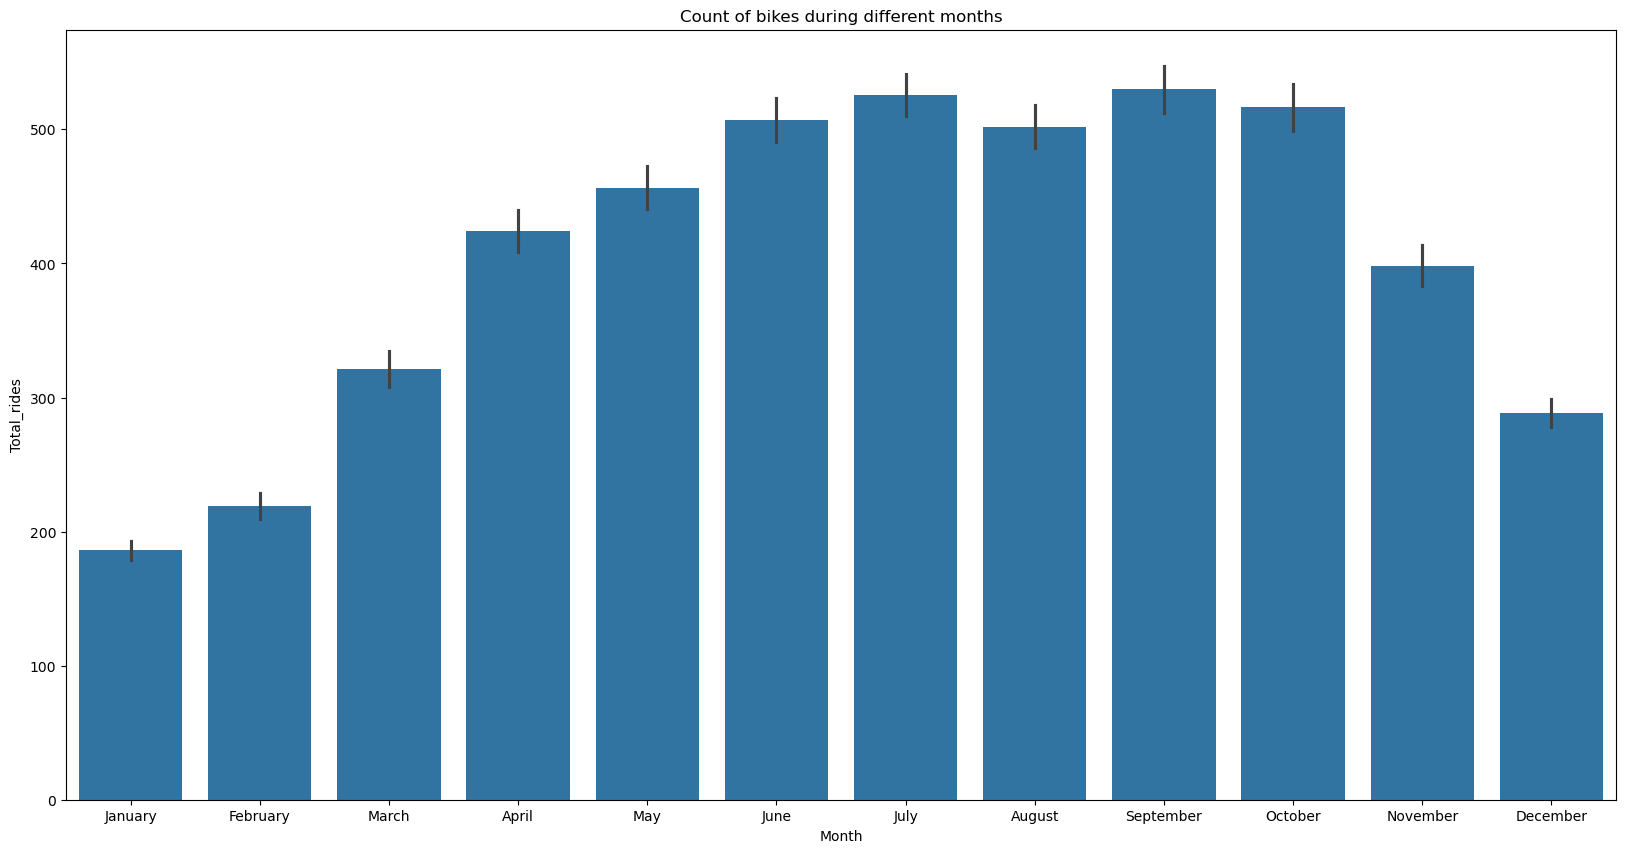

In [89]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=dfH, x='Month', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different months')

In [90]:
dfH.head()

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   
3     9.0 2021-01-01     3     7.0         16.0        81   1.6        2   
4     7.0 2021-01-01     4     5.0         12.0        77   1.6        2   

   Windspeed  Count  ...  Season  day_of_week is_weekday is_weekend  \
0       10.2      0  ...  Winter            4       True      False   
1       10.0      1  ...  Winter            4       True      False   
2       10.1      2  ...  Winter            4       True      False   
3       10.6      3  ...  Winter            4       True      False   
4        9.9      4  ...  Winter            4       True      False   

   is_holiday  is_working_day  month_year  weather_condition  Time_Category  \
0       False            True     2021-01             cloudy      Weak Hour   
1       False            True     2021-01             cloudy      Weak Hour   
2       False            True     2021-01             cloudy      Weak Hour   
3       False            True     2021-01             cloudy      Weak Hour   
4       False            True     2021-01             cloudy      Weak Hour   

  Rush_Hour and Weak_hour  
0               Weak Hour  
1               Weak Hour  
2               Weak Hour  
3               Weak Hour  
4               Weak Hour  

[5 rows x 23 columns]

In [91]:
# # Create a correlation matrix for red wine features
# plt.figure(figsize=(10,8))
# corr_matrix_Hour = dfH.corr()

# # Create a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix_Hour, dtype=bool))
# sns.heatmap(corr_matrix_Hour, annot=True, cmap="YlGnBu",fmt= '.2f', square=True, mask=mask)
# plt.title('Correlation Matrix')
# plt.show()

In [92]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'year', 'day of week',
       'Season', 'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day', 'month_year', 'weather_condition', 'Time_Category',
       'Rush_Hour and Weak_hour'],
      dtype='object')

Monthly Rides:
 Date
1     4.149873e+05
2     4.414485e+05
3     7.170663e+05
4     9.164410e+05
5     1.018950e+06
6     1.095706e+06
7     1.172531e+06
8     1.119783e+06
9     1.145372e+06
10    1.152693e+06
11    8.603750e+05
12    6.431220e+05
Name: Total_rides, dtype: float64


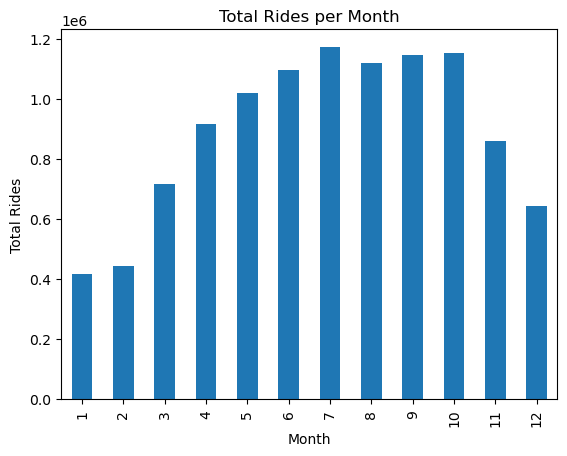

In [93]:
# Total Rides per Time Period (Monthly)
monthly_rides = dfH.groupby(dfH['Date'].dt.month)['Total_rides'].sum()
print("Monthly Rides:\n", monthly_rides)
monthly_rides.plot(kind='bar')
plt.title('Total Rides per Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.show()



Average Rides per Day of Week:
 day_of_week
0    369.498397
1    402.543613
2    412.428979
3    411.030474
4    406.825448
5    455.050425
6    392.083144
Name: Total_rides, dtype: float64


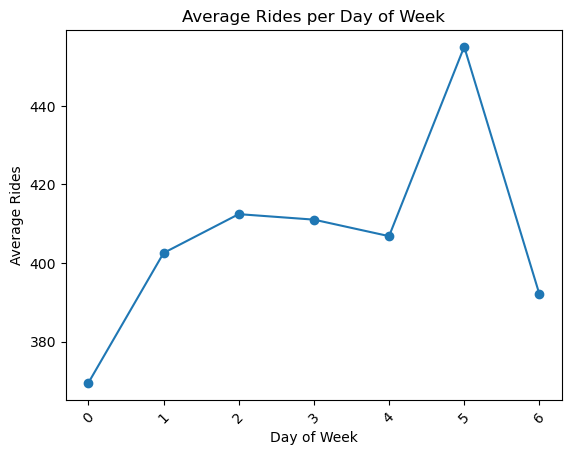

In [94]:
# Average Rides per Day of Week
daily_rides = dfH.groupby('day_of_week')['Total_rides'].mean()
print("\nAverage Rides per Day of Week:\n", daily_rides)
daily_rides.plot(kind='line', marker='o')
plt.title('Average Rides per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



Rides per Hour:
 Hour
0     1.185800e+05
1     7.442510e+04
2     4.923957e+04
3     2.703538e+04
4     2.189000e+04
5     5.939800e+04
6     1.694090e+05
7     3.756030e+05
8     6.322090e+05
9     5.161340e+05
10    4.878720e+05
11    5.642880e+05
12    6.459650e+05
13    6.603960e+05
14    6.739940e+05
15    7.474550e+05
16    8.336970e+05
17    1.046638e+06
18    9.288940e+05
19    6.960190e+05
20    4.928260e+05
21    3.778220e+05
22    2.963930e+05
23    2.022930e+05
Name: Total_rides, dtype: float64


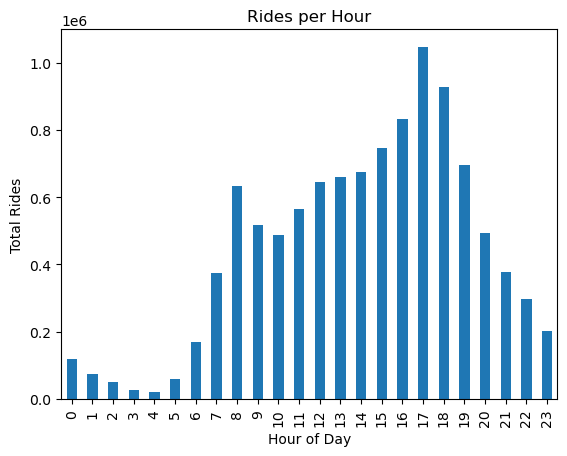

In [95]:
# Rides per Hour
hourly_rides = dfH.groupby('Hour')['Total_rides'].sum()
print("\nRides per Hour:\n", hourly_rides)
hourly_rides.plot(kind='bar')
plt.title('Rides per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rides')
plt.show()



Rider Type Distribution:
 Member
11.0      1.012177
8.0       1.000761
12.0      0.977930
5.0       0.955099
7.0       0.947489
            ...   
950.0     0.003805
810.0     0.003805
872.0     0.003805
762.0     0.003805
1000.0    0.003805
Name: proportion, Length: 1160, dtype: float64


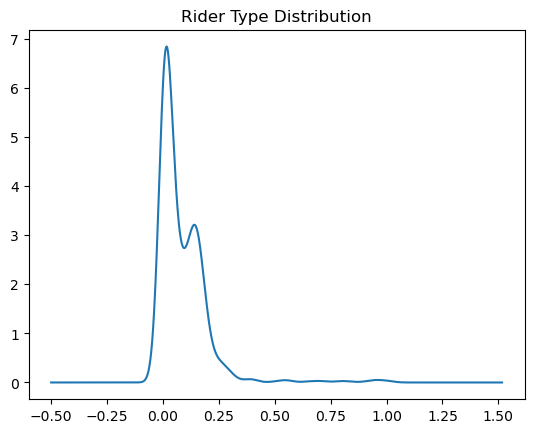

In [96]:
# Rider Type Distribution
rider_type_distribution = dfH['Member'].value_counts(normalize=True) * 100 # Assuming 'Member' is boolean or has two values
print("\nRider Type Distribution:\n", rider_type_distribution)
rider_type_distribution.plot(kind='kde')
plt.title('Rider Type Distribution')
plt.ylabel('')  # Remove default y-label
plt.show()


In [97]:
dfH.head()

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   
2    20.0 2021-01-01     2    28.0         48.0        87   1.1        2   
3     9.0 2021-01-01     3     7.0         16.0        81   1.6        2   
4     7.0 2021-01-01     4     5.0         12.0        77   1.6        2   

   Windspeed  Count  ...  Season  day_of_week is_weekday is_weekend  \
0       10.2      0  ...  Winter            4       True      False   
1       10.0      1  ...  Winter            4       True      False   
2       10.1      2  ...  Winter            4       True      False   
3       10.6      3  ...  Winter            4       True      False   
4        9.9      4  ...  Winter            4       True      False   

   is_holiday  is_working_day  month_year  weather_condition  Time_Category  \
0       False            True     2021-01             cloudy      Weak Hour   
1       False            True     2021-01             cloudy      Weak Hour   
2       False            True     2021-01             cloudy      Weak Hour   
3       False            True     2021-01             cloudy      Weak Hour   
4       False            True     2021-01             cloudy      Weak Hour   

  Rush_Hour and Weak_hour  
0               Weak Hour  
1               Weak Hour  
2               Weak Hour  
3               Weak Hour  
4               Weak Hour  

[5 rows x 23 columns]

In [98]:
dfH['time_of_day'] = dfH['Hour'].apply(lambda value: 'Morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'Afternoon' if value in (12,13,14,15,16)
                                                        else 'Evening' if value in (17,18,19,20,21) 
                                                        else 'Night')

dfH['time_of_day'] = pd.Categorical(dfH['time_of_day'],
categories=["Morning","Afternoon","Evening","Night"])

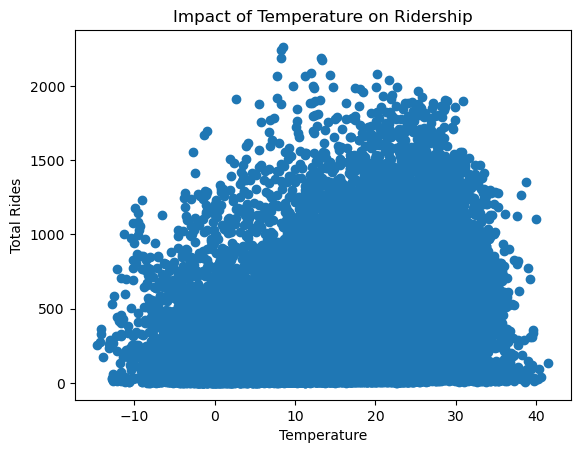

In [99]:
# Impact of Weather (Example: Temperature)
plt.scatter(dfH['Temp'], dfH['Total_rides'])
plt.title('Impact of Temperature on Ridership')
plt.xlabel('Temperature')
plt.ylabel('Total Rides')
plt.show()


In [100]:
# Correlation analysis
correlation = dfH['Temp'].corr(dfH['Total_rides'])
print(f"\nCorrelation between Temperature and Rides: {correlation}")


Correlation between Temperature and Rides: 0.3784965800284257


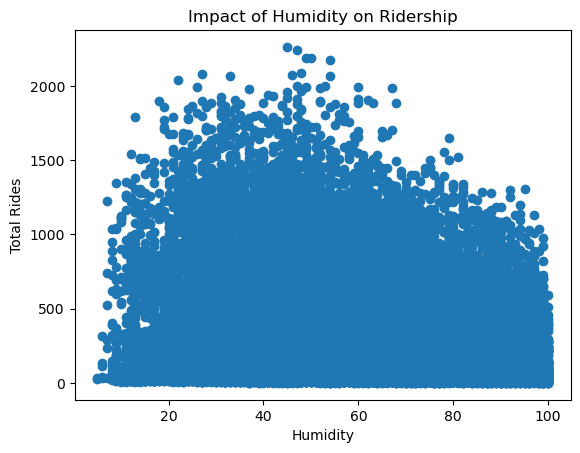

In [101]:
# Impact of Weather (Example: Humidity)
plt.scatter(dfH['Humidity'], dfH['Total_rides'])
plt.title('Impact of Humidity on Ridership')
plt.xlabel('Humidity')
plt.ylabel('Total Rides')
plt.show()


In [102]:
correlation = dfH['Humidity'].corr(dfH['Total_rides'])
print(f"\nCorrelation between Humidity and Rides: {correlation}")


Correlation between Humidity and Rides: -0.357479858950757



Seasonal Rides:
 Season
Autumn    3.158440e+06
Spring    2.652457e+06
Summer    3.388020e+06
Winter    1.499558e+06
Name: Total_rides, dtype: float64


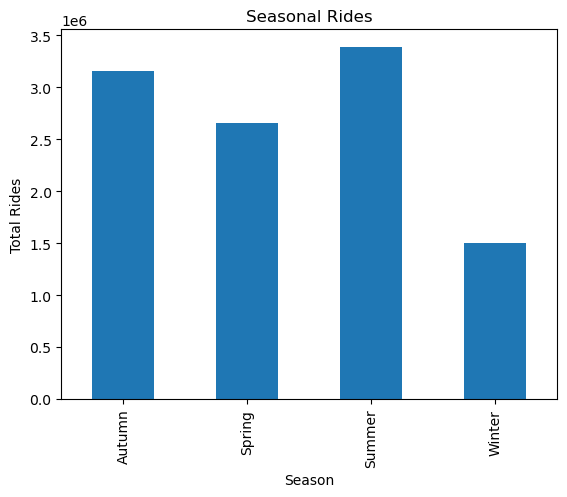

In [103]:
# Seasonal Trends
seasonal_rides = dfH.groupby('Season')['Total_rides'].sum()
print("\nSeasonal Rides:\n", seasonal_rides)
seasonal_rides.plot(kind='bar')
plt.title('Seasonal Rides')
plt.xlabel('Season')
plt.ylabel('Total Rides')
plt.show()


In [104]:
# # Create a copy BEFORE making any changes
# dfH.new = dfH.copy()  # This is crucial!
# # Save the modified DataFrame to a new CSV
# dfH.new.to_csv("Hourdata.csv", index=False) # index=False prevents saving row indices

# # The original df remains unchanged.

In [105]:
# # Example: Rides by Member vs. Casual during different seasons
# member_casual_seasonal = dfH.groupby(['Season', 'Member'])['Total_rides'].sum().unstack()
# print("\nRides by Member vs. Casual during different seasons:\n", member_casual_seasonal)
# member_casual_seasonal.plot(kind='bar', stacked=True)
# plt.title('Rides by Member vs. Casual during different seasons')
# plt.xlabel('Season')
# plt.ylabel('Total Rides')
# plt.show()


In [106]:
dfH.head(2)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   

   Windspeed  Count  ... day_of_week  is_weekday is_weekend is_holiday  \
0       10.2      0  ...           4        True      False      False   
1       10.0      1  ...           4        True      False      False   

   is_working_day  month_year  weather_condition  Time_Category  \
0            True     2021-01             cloudy      Weak Hour   
1            True     2021-01             cloudy      Weak Hour   

   Rush_Hour and Weak_hour time_of_day  
0                Weak Hour       Night  
1                Weak Hour       Night  

[2 rows x 24 columns]

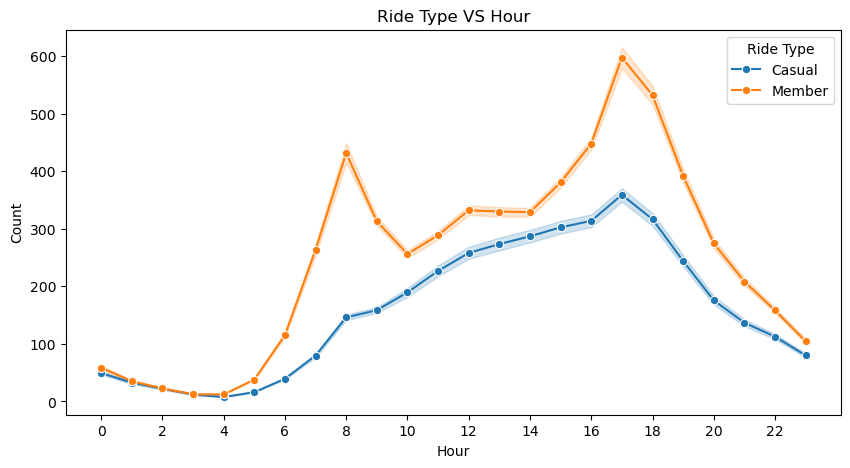

In [107]:
plt.figure(figsize=(10,5))
plt.title ('Ride Type VS Hour')
sns.lineplot(dfH, y='Casual' , x='Hour' , label = 'Casual', marker='o')
sns.lineplot(dfH, y='Member' , x='Hour', label = 'Member', marker='o')
# Add legend
plt.legend(title='Ride Type', loc='upper right')
plt.xticks(ticks=range(0, 24, 2)) 
plt.ylabel('Count')
plt.show()

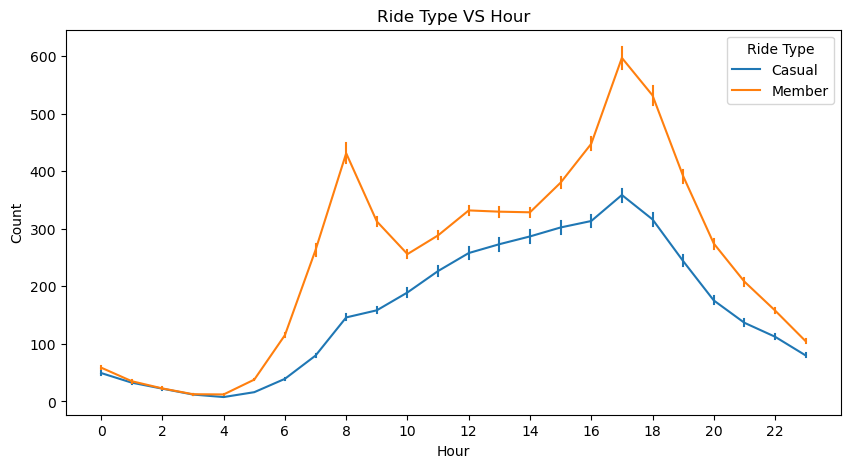

In [108]:
plt.figure(figsize=(10,5))
plt.title ('Ride Type VS Hour')
sns.lineplot(dfH, y='Casual' , x='Hour' , label = 'Casual',err_style="bars")
sns.lineplot(dfH, y='Member' , x='Hour', label = 'Member',err_style="bars")
# Add legend
plt.legend(title='Ride Type', loc='upper right')
plt.xticks(ticks=range(0, 24, 2)) 
plt.ylabel('Count')
plt.show()

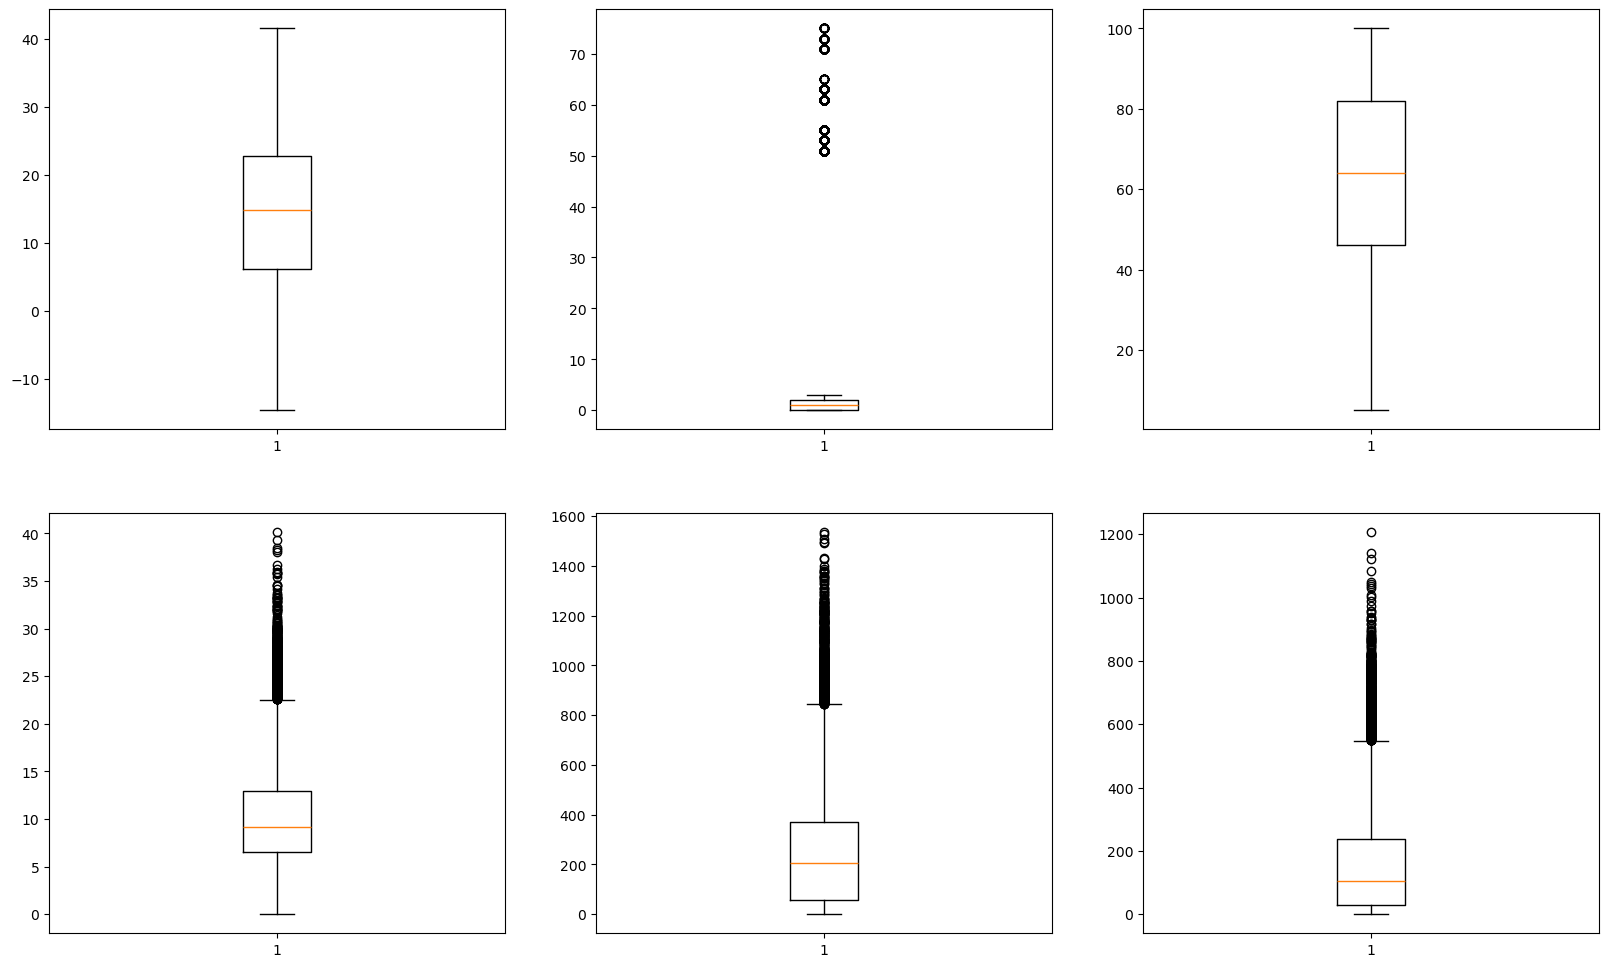

In [109]:
#Plotting box plot of continuous variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.boxplot(dfH["Temp"])
plt.subplot(2,3,2)
plt.boxplot(dfH["weather"])
plt.subplot(2,3,3)
plt.boxplot(dfH["Humidity"])
plt.subplot(2,3,4)
plt.boxplot(dfH["Windspeed"])
plt.subplot(2,3,5)
plt.boxplot(dfH["Member"])
plt.subplot(2,3,6)
plt.boxplot(dfH["Casual"])
plt.show()

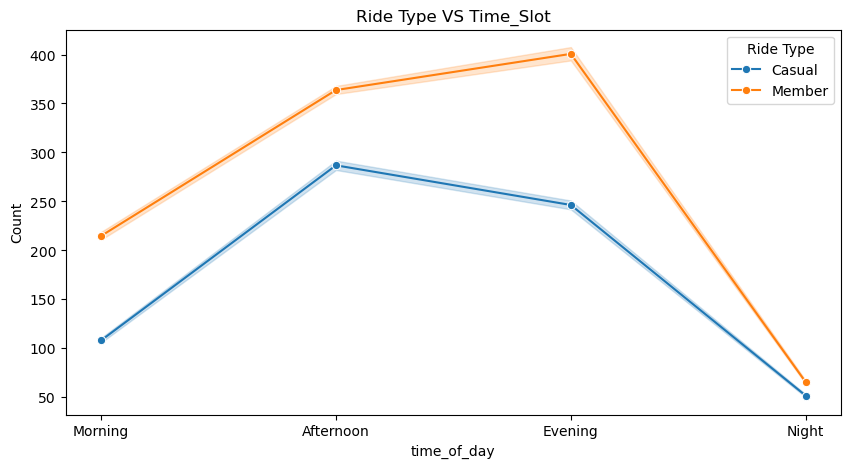

In [110]:
plt.figure(figsize=(10,5))
plt.title ('Ride Type VS Time_Slot')
sns.lineplot(data=dfH, x='time_of_day', y='Casual' ,label = 'Casual', marker='o')
sns.lineplot(data=dfH,x= 'time_of_day', y='Member' ,label = 'Member', marker='o')

# Add legend
plt.legend(title='Ride Type', loc='upper right') #(np.float64(0.4104813546423145), np.float64(486.8418245814307))
plt.ylabel('Count')
# Show the plot
plt.show()

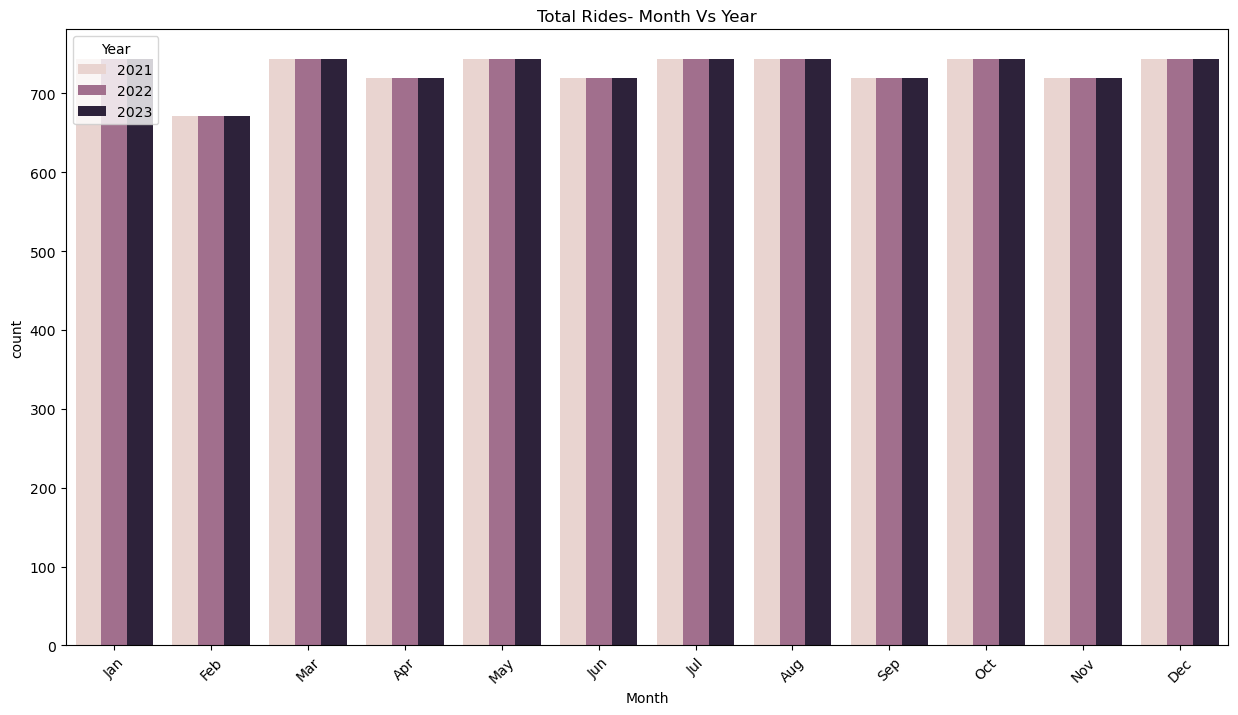

In [111]:
plt.figure(figsize=(15, 8))
plt.title('Total Rides- Month Vs Year')

# Create count plot
sns.countplot(data=dfH, x='Month', hue='year')

# Set x-axis labels to month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months, rotation=45)

# Add legend
plt.legend(title='Year', loc='upper left')

# Show the plot
plt.show()

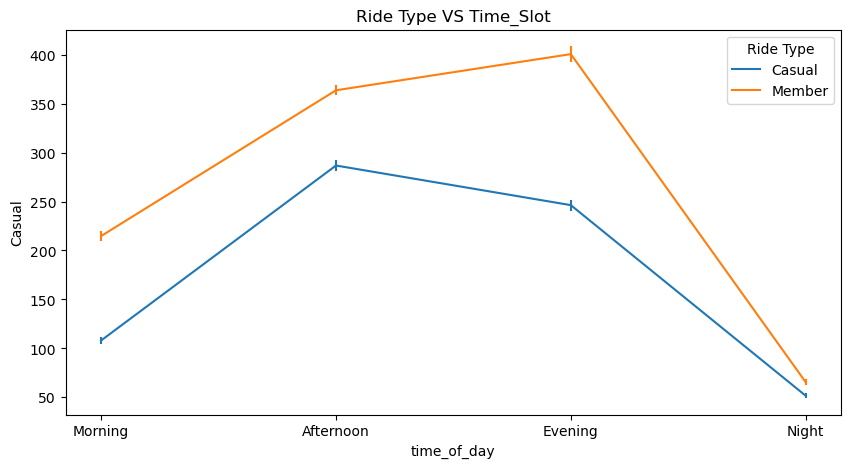

In [112]:
plt.figure(figsize=(10,5))
plt.title ('Ride Type VS Time_Slot')
sns.lineplot(data=dfH, x='time_of_day', y='Casual' ,label = 'Casual',err_style="bars")
sns.lineplot(data=dfH,x= 'time_of_day', y='Member' ,label = 'Member',err_style="bars")

# Add legend
plt.legend(title='Ride Type', loc='upper right') #(np.float64(0.4104813546423145), np.float64(486.8418245814307))

# Show the plot
plt.show()

<Axes: xlabel='Windspeed', ylabel='Density'>

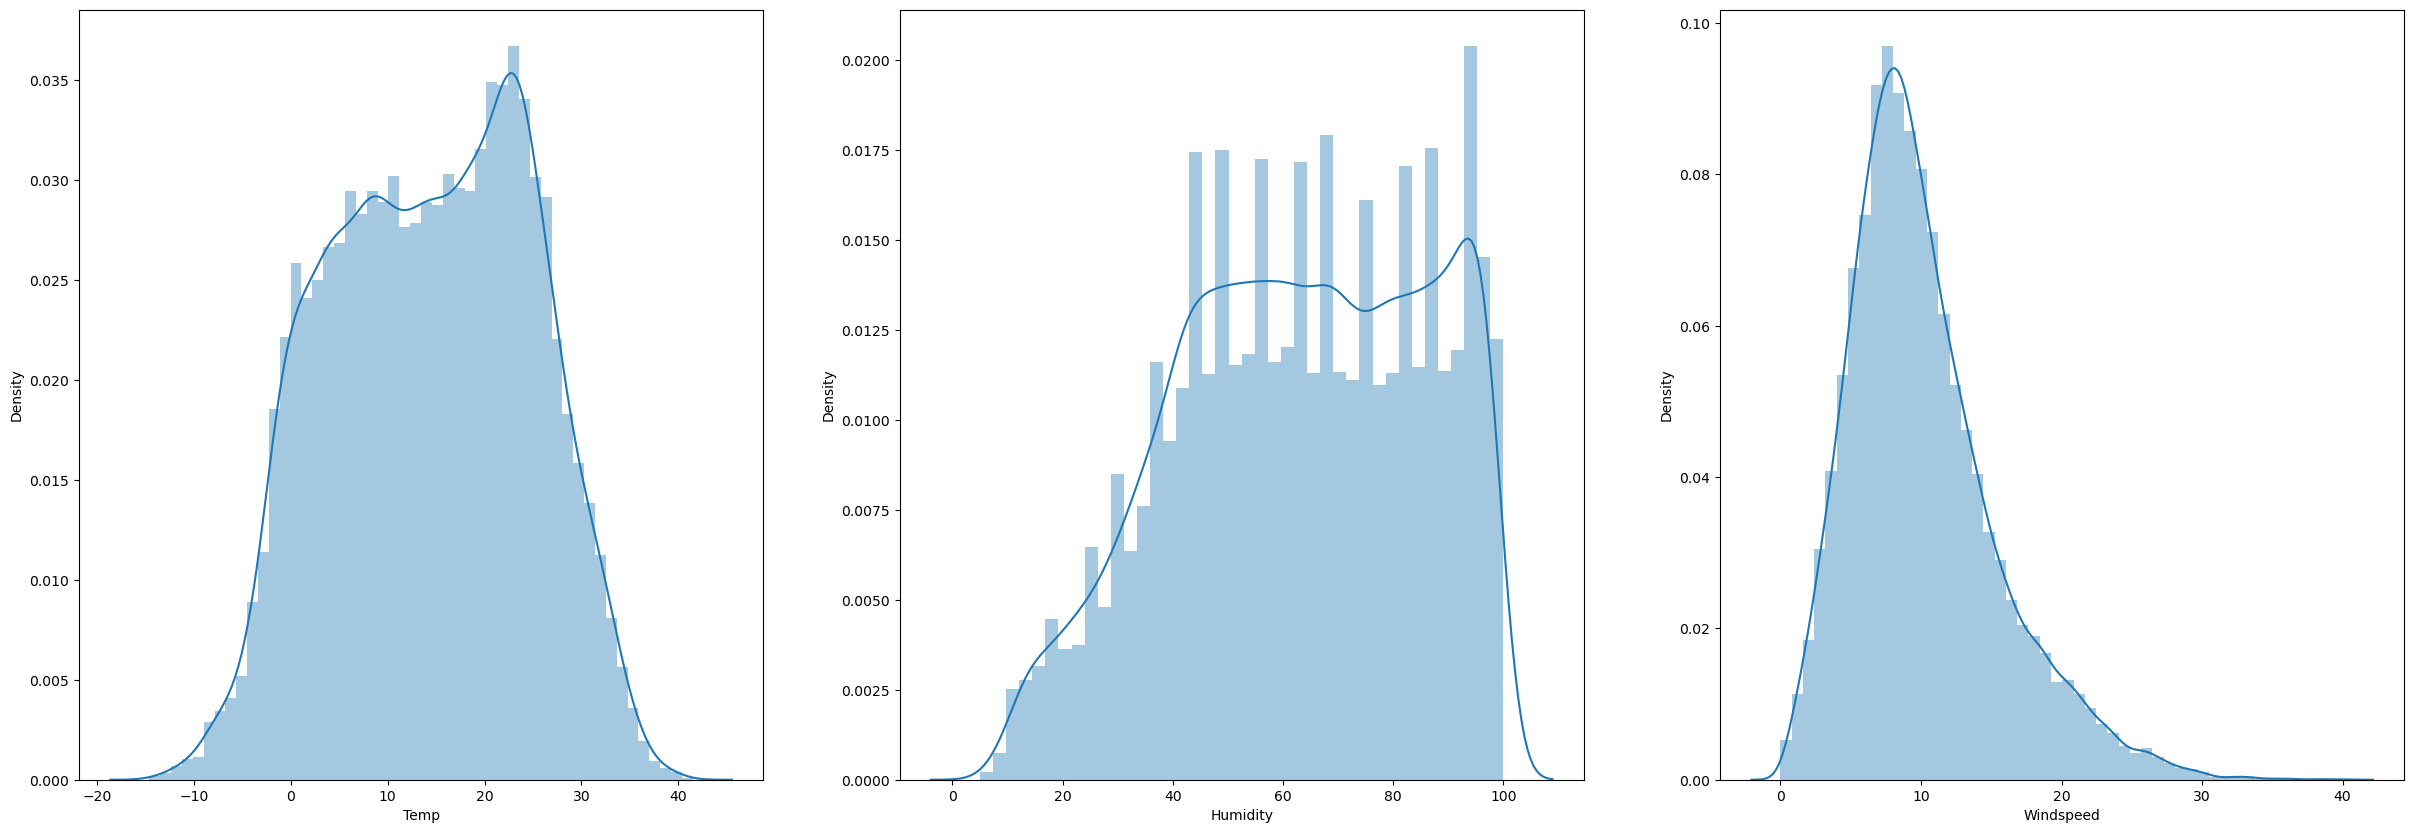

In [113]:
# Plot temp on y bar
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(30, 10))
sns.distplot(dfH['Temp'], ax=ax1)
sns.distplot(dfH['Humidity'], ax=ax2)
sns.distplot(dfH['Windspeed'],ax=ax3)

In [114]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'year', 'day of week',
       'Season', 'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day', 'month_year', 'weather_condition', 'Time_Category',
       'Rush_Hour and Weak_hour', 'time_of_day'],
      dtype='object')

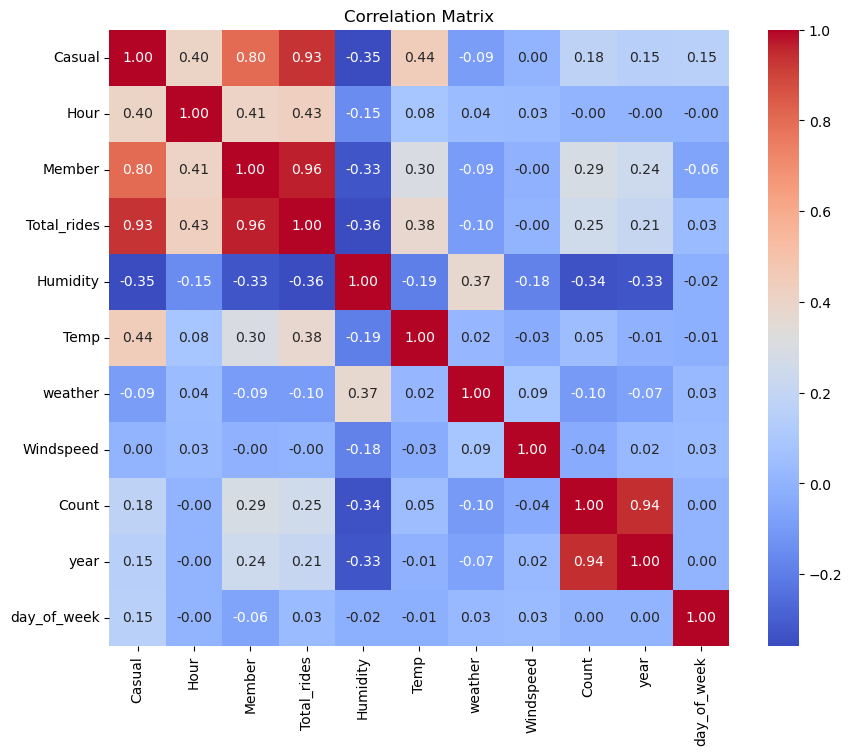

In [115]:
#selecting only the columns that are numeric for the correlation matrix
numeric_columns = dfH.select_dtypes(include=[np.number]).columns

#creating a correlation matrix
correlation_matrix = dfH[numeric_columns].corr()

#generating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Machine Learning for Total Rides

Select features and target variable
Encode categorical variables

In [117]:
X = dfH[['Temp', 'Humidity', 'Windspeed', 'Hour', 'day_of_week']] 
y = dfH['Total_rides'] 


In [118]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

Split data into training and testing sets

Train and Evaluate Models
Linear Regression


In [120]:
# Create a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression: MSE = {lr_mse:.2f}, R-squared = {lr_r2:.2f}") 


Linear Regression: MSE = 88537.09, R-squared = 0.36


Decision Tree Regression

In [121]:
# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree: MSE = {dt_mse:.2f}, R-squared = {dt_r2:.2f}") 

#make predictions
predictions = dt_model.predict(X_test)


Decision Tree: MSE = 46511.57, R-squared = 0.66


Random Forest Regression

In [122]:
# Create a Decision Tree Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest: MSE = {rf_mse:.2f}, R-squared = {rf_r2:.2f}") 
#make predictions
predictions = dt_model.predict(X_test)


Random Forest: MSE = 24273.84, R-squared = 0.82


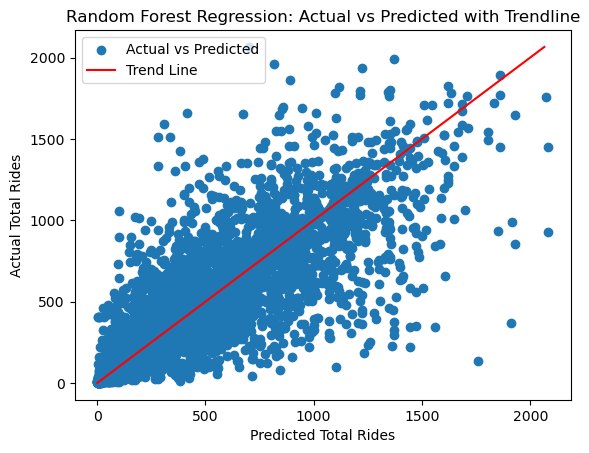

In [123]:
# Scatter plot: predicted vs actual values
plt.scatter(predictions, y_test, label='Actual vs Predicted')

# Plot the trend line
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', label='Trend Line')

# Adding labels and title
plt.xlabel('Predicted Total Rides')
plt.ylabel('Actual Total Rides')
plt.title('Random Forest Regression: Actual vs Predicted with Trendline')

# Display legend
plt.legend()

# Show the plot
plt.show()

Machine Learning for Member with Multivariate

In [124]:
X1 = dfH[['Temp', 'Humidity', 'Windspeed', 'Hour', 'day_of_week']] 
y1 = dfH['Member'] 

In [125]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

Split data into training and testing sets

Train and Evaluate Models

Linear Regression

In [126]:
# Create a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression: MSE = {lr_mse:.2f}, R-squared = {lr_r2:.2f}") 

Linear Regression: MSE = 36132.06, R-squared = 0.29


Decision Tree Regression

In [127]:
# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree: MSE = {dt_mse:.2f}, R-squared = {dt_r2:.2f}") 

Decision Tree: MSE = 19283.73, R-squared = 0.62


Random Forest Regression

In [128]:
# Create a Decision Tree Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest: MSE = {rf_mse:.2f}, R-squared = {rf_r2:.2f}") 

#make predictions
predictions = rf_model.predict(X_test)

Random Forest: MSE = 10105.73, R-squared = 0.80


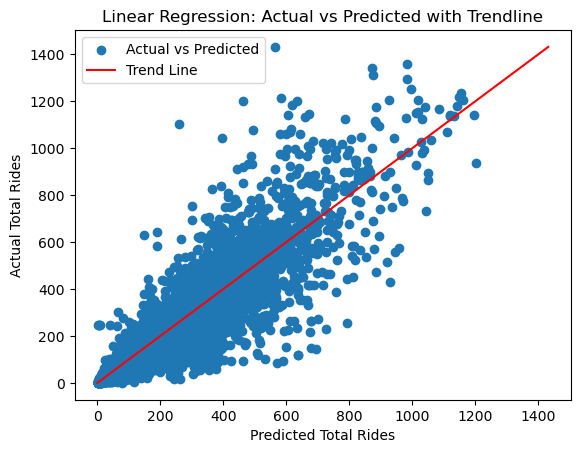

In [129]:
# Scatter plot: predicted vs actual values
plt.scatter(predictions, y_test, label='Actual vs Predicted')

# Plot the trend line
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', label='Trend Line')

# Adding labels and title
plt.xlabel('Predicted Total Rides')
plt.ylabel('Actual Total Rides')
plt.title('Linear Regression: Actual vs Predicted with Trendline')

# Display legend
plt.legend()

# Show the plot
plt.show()

Member Linear Regression with Univariate

Mean Squared Error (MSE): 46404.15763102488
R^2 Score: 0.0919683119080632


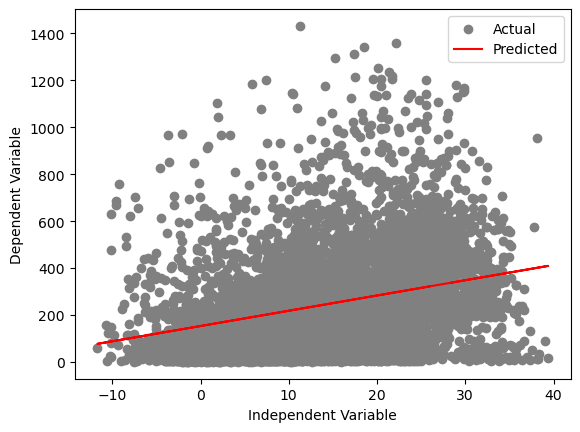

In [130]:
#prepare the data
X2 = dfH[['Temp']]
y2 = dfH['Member']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_pred
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

#make predictions
predictions = model.predict(X_test)

# Step 7: Visualize the results
plt.scatter(X_test, y_test, color='.5', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()

In [131]:
# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree: MSE = {dt_mse:.2f}, R-squared = {dt_r2:.2f}") 

Decision Tree: MSE = 46472.00, R-squared = 0.09


Casual Linear Regression with Univariate

Mean Squared Error (MSE): 21941.007007737444
R^2 Score: 0.19957038446643793


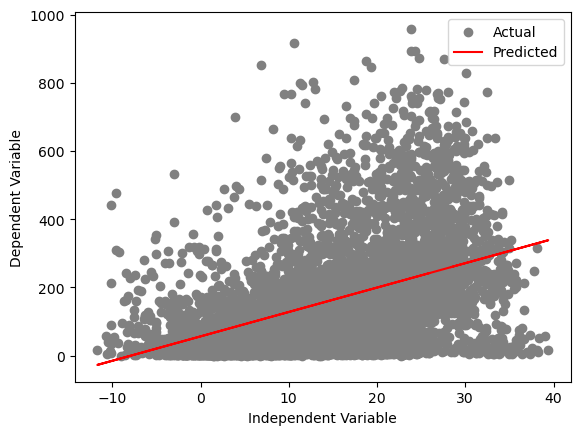

In [132]:
#prepare the data
X3 = dfH[['Temp']]
y3 = dfH['Casual']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

#make predictions
predictions = model.predict(X_test)

# Step 7: Visualize the results
plt.scatter(X_test, y_test, color='.5', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()

Total Rides Linear Regression with multivariate

In [133]:
#prepare the data
X4 = dfH[['Temp', 'Humidity', 'Windspeed']]
y4 = dfH['Total_rides']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 105445.99393166926
R^2 Score: 0.23624324797331953


In [134]:
# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree: MSE = {dt_mse:.2f}, R-squared = {dt_r2:.2f}") 

Decision Tree: MSE = 176344.99, R-squared = -0.28


Correlation Matrix

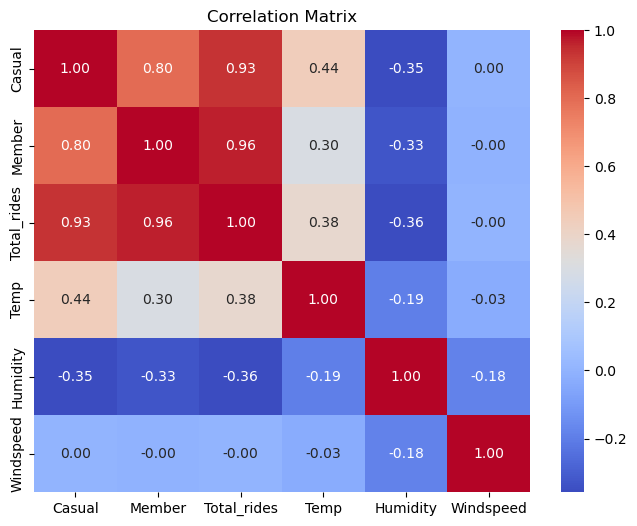

In [135]:
#numerical columns that are related to total rides, casual, and member
numeric_columns = ['Casual', 'Member', 'Total_rides', 'Temp', 'Humidity', 'Windspeed']
correlation_matrix = dfH[numeric_columns].corr()

#generating a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [136]:
dfH.head(2)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   

   Windspeed  Count  ... day_of_week  is_weekday is_weekend is_holiday  \
0       10.2      0  ...           4        True      False      False   
1       10.0      1  ...           4        True      False      False   

   is_working_day  month_year  weather_condition  Time_Category  \
0            True     2021-01             cloudy      Weak Hour   
1            True     2021-01             cloudy      Weak Hour   

   Rush_Hour and Weak_hour time_of_day  
0                Weak Hour       Night  
1                Weak Hour       Night  

[2 rows x 24 columns]

polynomial Regression

In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [138]:
# Prepare the data for Polynomial Regression
X5 = dfH[['is_holiday', 'Month', 'day_of_week', 'Season', 'time_of_day', 'weather_condition', 'Humidity', 'Windspeed']]
y5 = dfH['Casual']

# Encode categorical variables
X5_encoded = pd.get_dummies(X5, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X5_encoded, y5, test_size=0.2, random_state=42)

# Apply Polynomial Features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("polynomial Regression: MSE", mse)
print("R^2 Score:", r2)

polynomial Regression: MSE 10265.718338259505
R^2 Score: 0.625496451472296


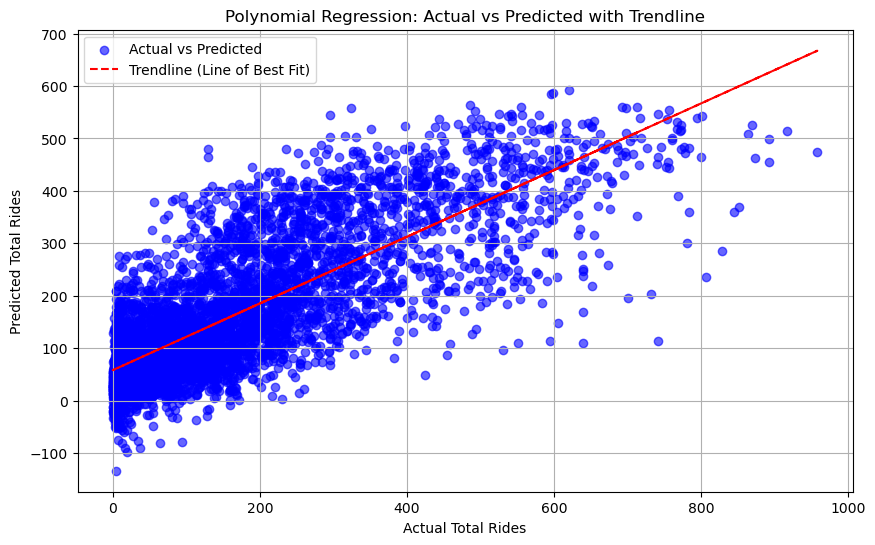

In [139]:
# Plotting the scatter plot of Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted', alpha=0.6)

# Fit a linear regression model for the trendline (line of best fit)
linear_reg = LinearRegression()
linear_reg.fit(y_test.values.reshape(-1, 1), y_pred)  # Fit on actual vs predicted values

# Get predictions for the trendline
y_trendline = linear_reg.predict(y_test.values.reshape(-1, 1))

# Plot the trendline
plt.plot(y_test, y_trendline, label='Trendline (Line of Best Fit)', color='red', linestyle='--')

plt.grid(True)
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.title('Polynomial Regression: Actual vs Predicted with Trendline')
plt.legend()
plt.show()

In [140]:
X6 = dfH[['is_holiday', 'Month', 'day_of_week', 'Season', 'time_of_day', 'weather_condition', 'Humidity', 'Windspeed']]
y6 = dfH['Member']

# Encode categorical variables
X6_encoded = pd.get_dummies(X5, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X6_encoded, y6, test_size=0.2, random_state=42)

# Apply Polynomial Features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 24010.57598090652
R^2 Score: 0.5301635682440307


In [141]:
X7 = dfH[['is_holiday', 'Month', 'day_of_week', 'Season', 'time_of_day', 'weather_condition', 'Humidity', 'Windspeed']]
y7 = dfH['Total_rides']

# Encode categorical variables
X7_encoded = pd.get_dummies(X5, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X7_encoded, y7, test_size=0.2, random_state=42)

# Apply Polynomial Features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 57332.76393856748
R^2 Score: 0.5847325826450247


In [142]:
dfH.head(2)

Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
0    20.0 2021-01-01     0    26.0         46.0        90   2.4        1   
1    23.0 2021-01-01     1    23.0         46.0        88   1.8        1   

   Windspeed  Count  ... day_of_week  is_weekday is_weekend is_holiday  \
0       10.2      0  ...           4        True      False      False   
1       10.0      1  ...           4        True      False      False   

   is_working_day  month_year  weather_condition  Time_Category  \
0            True     2021-01             cloudy      Weak Hour   
1            True     2021-01             cloudy      Weak Hour   

   Rush_Hour and Weak_hour time_of_day  
0                Weak Hour       Night  
1                Weak Hour       Night  

[2 rows x 24 columns]